<h1 align="center"> Portfolio 1: Data visualization, Classical test theory, & Confirmatory factor analysis</h1>

#### by Muhammad Kevin Alrahmanto (muhammad.kevin@mail.ugm.ac.id / kevinalrahmantomuhammad@gmail.com)

This notebook presents an analysis of survey data collected by Abraham et al. (2020).  In addition to conducting the standard confirmatory factor analysis as reported in the original paper, I have also included a range of data visualization techniques and inferential statistics to gain more insights. While the original paper used three datasets, in this notebook I will use only Celebirty Worship (CWS) dataset. The result of this analysis has a potential for domain knowledge experts to gain **additional insights regarding the effectiveness of celebrity endorsement in the market research.**

<div class="alert-info">
<font color='blue'>
<h3 align="center">
The insight from each analysis is highlighted in blue 

In [1]:
getwd()

[1] "C:/Users/kevin"

**Original paper:** Confirmatory factor analysis of celebrity worship, digital literacy, and nostalgia: Dataset of Indonesians, digital literacy, and nostalgia: Dataset of Indonesians (https://www.sciencedirect.com/science/article/pii/S2352340920312993)

**Dataset:** Celebrity worship (CWS) ( https://ars.els-cdn.com/content/image/1-s2.0-S2352340920312993-mmc2.xlsx)

Description of CWS:
- Response options: from “Strongly Disagree” (scored 1) to “Strongly Agree” (scored 5).
- Data were taken in June 2018 and April-June 2020.

Item:
- Entertainment-social (ES):
 - ES1: I love to talk with others who admire my favorite celebrity
 - ES2: Keeping up with news about my favorite celebrity is an entertaining pass-time
 - ES3: It is enjoyable just to be with others who like my favorite celebrity
 - ES4: I enjoy watching, reading, or listening to my favorite celebrity because it means a good time
 - ES5: Learning the life story of my favorite celebrity is a lot of fun
 - ES6: I like watching and hearing about my favorite celebrity when I am in a large group of people
 - ES7: My friends and I like to discuss what my favorite celebrity has done
 
- Intense-personal (IP): 
 - IP1: If I were to meet my favorite celebrity in person, he/she would already somehow know that I am his/her biggest fan
 - IP2: One of the main reasons I maintain an interest in my favorite celebrity is that doing so gives me a temporary escape from life’s problems
 - IP3: My favorite celebrity is practically perfect in every way
 - IP4: I share with my favorite celebrity a special bond that cannot be described in words
 - IP5: To know my favorite celebrity is to love him/her
 - IP6: When something bad happens to my favorite celebrity I feel like it happened to me
 - IP7: When my favorite celebrity fails or loses at something I feel like a failure myself
 - IP8: The successes of my favorite celebrity are my successes also
 - IP9: I consider my favorite celebrity to be my soulmate
 - IP10: When my favorite celebrity dies (or died) I will feel (or I felt) like dying too
 - IP11: If someone gave me several thousand dollars to do with as I please, I would consider spending it on a personal possession (like a napkin or paper plate) once used by my favorite celebrity
 - IP12: When something good happens to my favorite celebrity I feel like it happened to me
 - IP13: I am obsessed by details of my favorite celebrity’s life
 
- Borderline-pathological (BP):
 - BP1: I would gladly die in order to save the life of my favorite celebrity
 - BP2: If I were lucky enough to meet my favorite celebrity, and he/she asked me to do something illegal as a favor, I would probably do it
 - BP3: If I walked through the door of my favorite celebrity's home without an invitation she or he would be happy to see me
 - BP4: I have frequent thoughts about my favorite celebrity, even when I don’t want to
 - BP5: My favorite celebrity would immediately come to my rescue if I needed help
 - BP6: My favorite celebrity and I have our own code so we can communicate with each other secretly (such as over the TV or special words on the radio)

In [2]:
library(pacman)
pacman::p_load(readxl, dplyr, tidyr, forcats, reactable, reactablefmtr, ggplot2, ggpubr, ggalluvial, ggsankey, plot3D, rgl,
               repr, psych, psy, polycor, Gifi, eRm, MPsychoR, mice, ShinyItemAnalysis, smacof, performance, MVN, gtheory,
              lavaan,semPlot, corrplot, ggstance,rstatix)

In [4]:
CWS <- read_excel("1-s2.0-S2352340920312993-mmc2.xlsx", sheet = 1)
CWS <- data.frame(unclass(CWS[, 1:31]), stringsAsFactors=T)
CWS$Subject.No <- factor(CWS$Subject.No)
head(CWS)

Subject.No Age Sex    Domicile     Domicile_Category ES1 ES2 ES3 ES4 ES5 ⋯
1 1          21  Female Banten       Java Island       4   3   3   3   3   ⋯
2 2          25  Female Central Java Java Island       1   1   1   1   1   ⋯
3 3          20  Female Jakarta      Java Island       4   4   4   4   3   ⋯
4 4          33  Female Banten       Java Island       5   5   5   5   5   ⋯
5 5          34  Female Jakarta      Java Island       5   5   5   5   5   ⋯
6 6          38  Female Banten       Java Island       5   5   5   5   5   ⋯
  IP10 IP11 IP12 IP13 BP1 BP2 BP3 BP4 BP5 BP6
1 2    2    2    2    2   3   2   2   2   2  
2 2    1    1    5    5   4   5   1   5   1  
3 2    3    3    2    1   2   2   3   1   2  
4 5    2    4    2    1   2   3   3   2   1  
5 4    5    5    3    4   3   1   5   1   1  
6 1    5    3    1    1   1   3   3   1   1

In [5]:
str(CWS)

'data.frame':	3223 obs. of  31 variables:
 $ Subject.No       : Factor w/ 3223 levels "1","2","3","4",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Age              : num  21 25 20 33 34 38 21 27 19 21 ...
 $ Sex              : Factor w/ 2 levels "Female","Male": 1 1 1 1 1 1 1 2 2 1 ...
 $ Domicile         : Factor w/ 33 levels "Aceh","Bali",..: 4 6 13 4 13 4 27 13 27 13 ...
 $ Domicile_Category: Factor w/ 2 levels "Java Island",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ ES1              : num  4 1 4 5 5 5 4 3 5 5 ...
 $ ES2              : num  3 1 4 5 5 5 4 3 5 5 ...
 $ ES3              : num  3 1 4 5 5 5 4 3 5 5 ...
 $ ES4              : num  3 1 4 5 5 5 4 4 5 5 ...
 $ ES5              : num  3 1 3 5 5 5 4 3 5 4 ...
 $ ES6              : num  3 1 4 5 5 3 2 3 5 4 ...
 $ ES7              : num  3 1 4 5 5 5 3 2 5 3 ...
 $ IP1              : num  4 1 3 3 3 3 3 4 3 1 ...
 $ IP2              : num  3 1 4 5 5 1 5 3 5 5 ...
 $ IP3              : num  3 1 2 2 1 2 4 4 5 3 ...
 $ IP4              : num  2 1 3 4 5 2 3 4 

<div class="alert-info">
<font color='blue'>
<h3 align="center">
~ 

# 1. Exploratory Data Analysis

## 1.1 Summary Descriptive Statistics

In [6]:
summary(CWS)

   Subject.No        Age            Sex               Domicile  
 1      :   1   Min.   :11.00   Female:3042   West Java   :750  
 2      :   1   1st Qu.:18.00   Male  : 181   Jakarta     :641  
 3      :   1   Median :19.00                 East Java   :408  
 4      :   1   Mean   :19.64                 Central Java:324  
 5      :   1   3rd Qu.:21.00                 Banten      :256  
 6      :   1   Max.   :40.00                 Yogyakarta  :123  
 (Other):3217   NA's   :2                     (Other)     :721  
           Domicile_Category      ES1             ES2             ES3       
 Java Island        :2502    Min.   :1.000   Min.   :1.000   Min.   :1.000  
 Outside Java Island: 721    1st Qu.:3.000   1st Qu.:3.000   1st Qu.:3.000  
                             Median :4.000   Median :4.000   Median :4.000  
                             Mean   :3.926   Mean   :3.796   Mean   :3.918  
                             3rd Qu.:5.000   3rd Qu.:4.000   3rd Qu.:5.000  
                  

<font color='blue'>
<h4 align="left">
Insight: BP1 has the lowest mean score, and ES4 has the highest mean score

- ES4: I enjoy watching, reading, or listening to my favorite celebrity because it means a good time
- BP1: I would gladly die in order to save the life of my favorite celebrity

In [7]:
round(sort(colMeans(CWS[, 6:31])),2)

BP1  BP3  BP6  BP5  BP2 IP13 IP10  IP9  IP4  IP7 IP11  IP3  BP4  IP6  IP1  IP8 
1.54 1.58 1.60 1.66 1.76 1.83 2.14 2.28 2.51 2.60 2.66 2.67 2.74 2.84 2.92 2.99 
IP12  IP5  ES7  ES5  ES6  ES2  IP2  ES3  ES1  ES4 
3.21 3.42 3.48 3.55 3.58 3.80 3.80 3.92 3.93 3.98

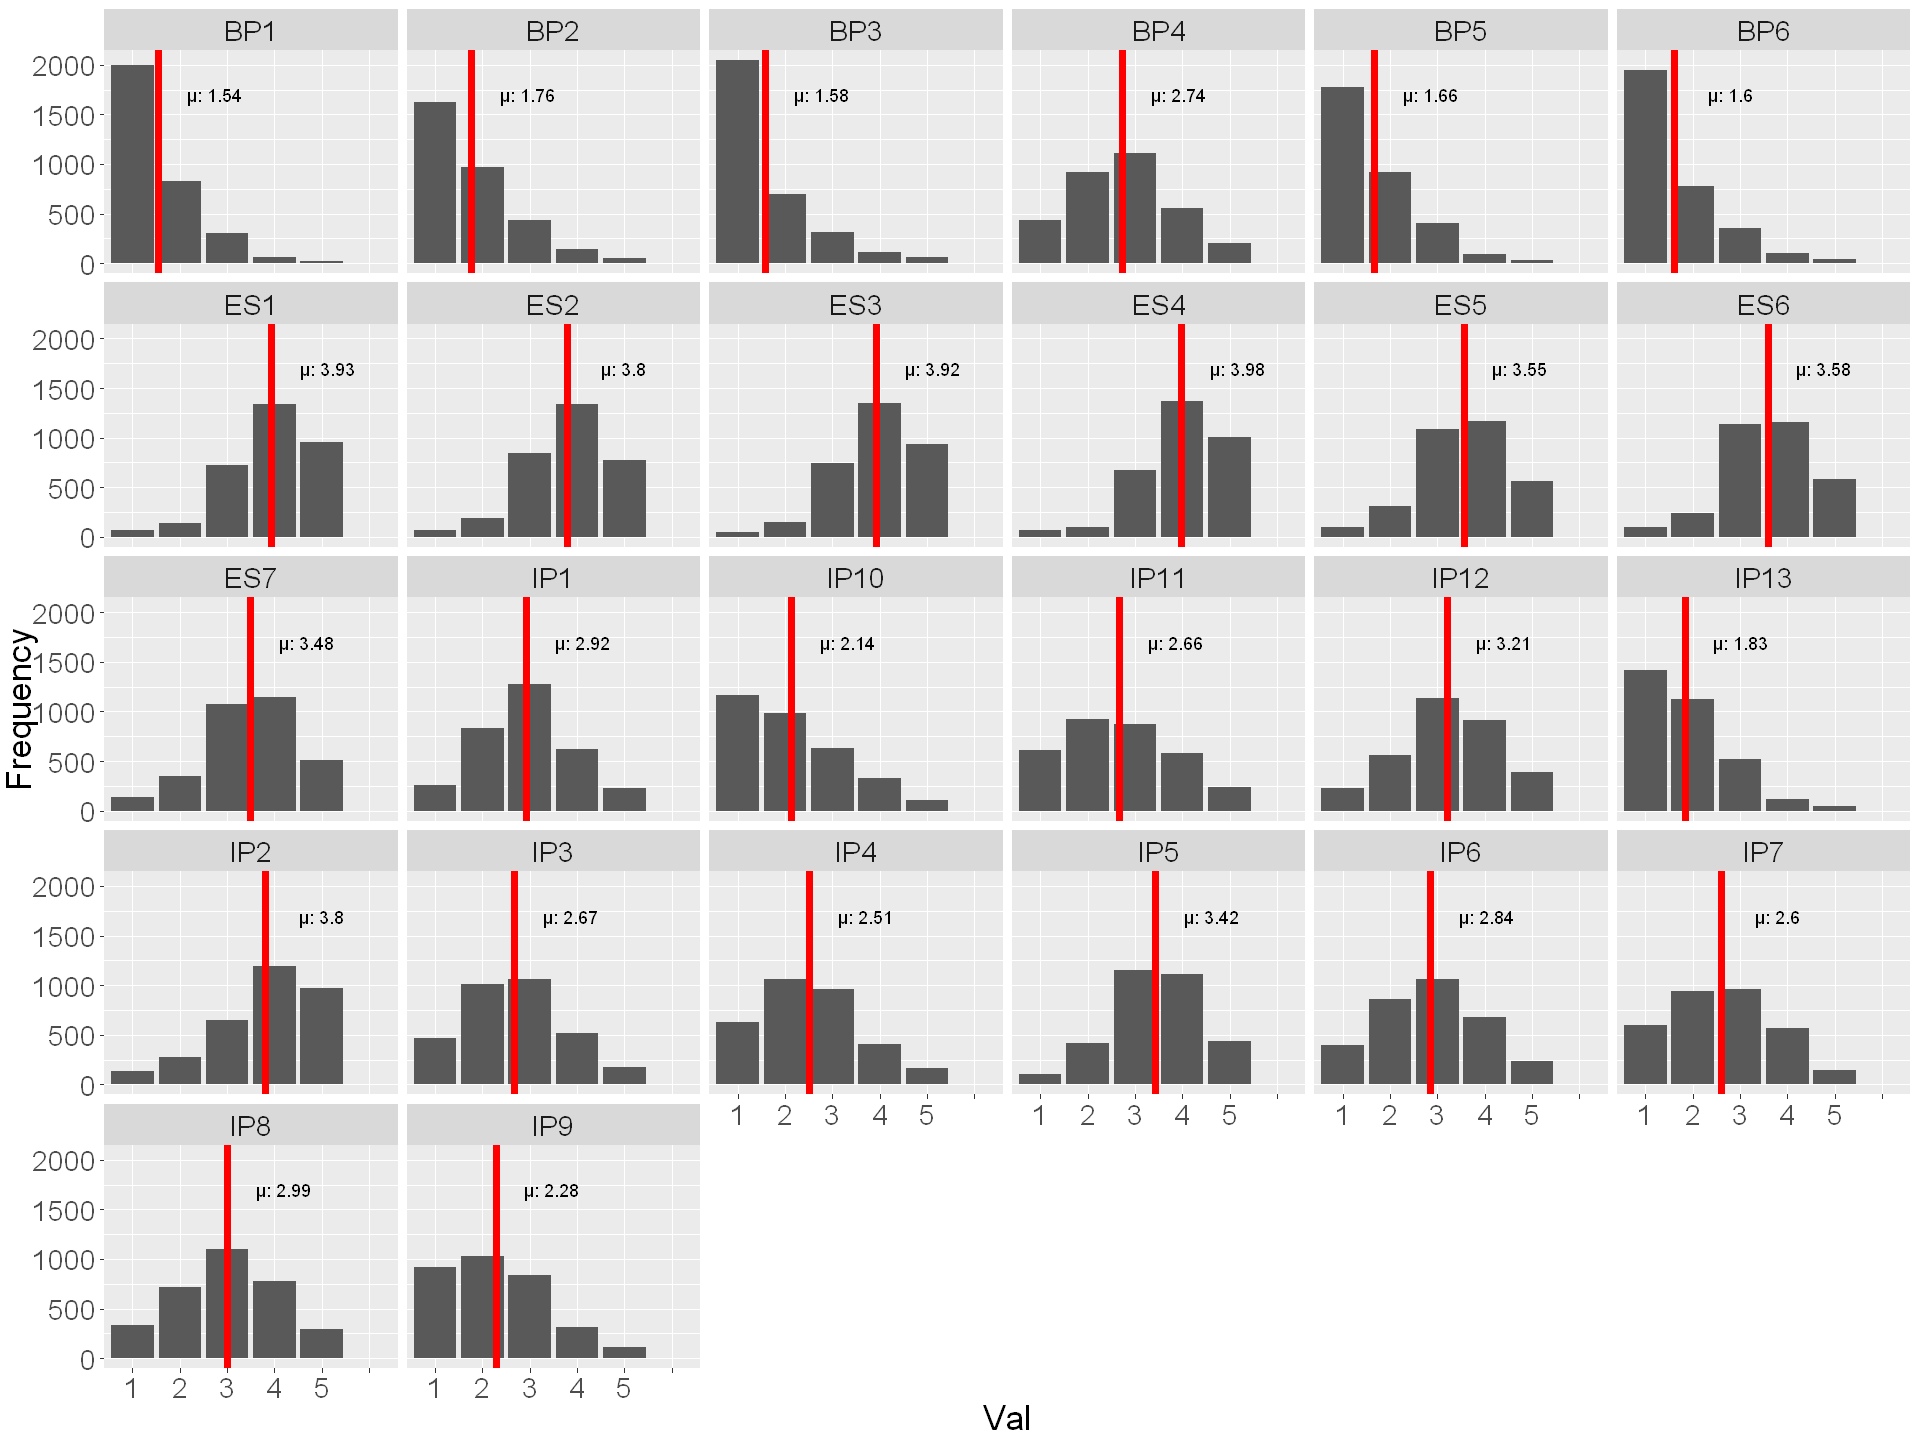

In [8]:
options(repr.plot.width=16, repr.plot.height=12)
CWS[, 6:length(CWS)] %>% data.frame() %>% gather('Vars', 'Val') %>% ggplot(aes(x=Val)) + theme(text=element_text(size=21))+
geom_bar() + stat_summaryh(fun.x=mean, geom="vline", aes(xintercept=after_stat(x), y=0), col='red', lwd=2) +
    stat_summaryh(fun.x=mean, geom="text", 
                  aes(label=paste0("μ: ",round(after_stat(x),2)), y=1700), 
                  angle=0, position=position_nudge(x=1.2))+
facet_wrap(~Vars) + scale_x_discrete(limits=c('1','2','3', '4', '5', '')) + labs(y='Frequency')

## 1.2 Respondent Characteristics

<font color='blue'>
<h4 align="left">
Insight: The respondent demographics show a significant overrepresentation of females from Java, possibly limiting generalization to other subpopulations or regions 

Warning message:
"attributes are not identical across measure variables; they will be dropped"


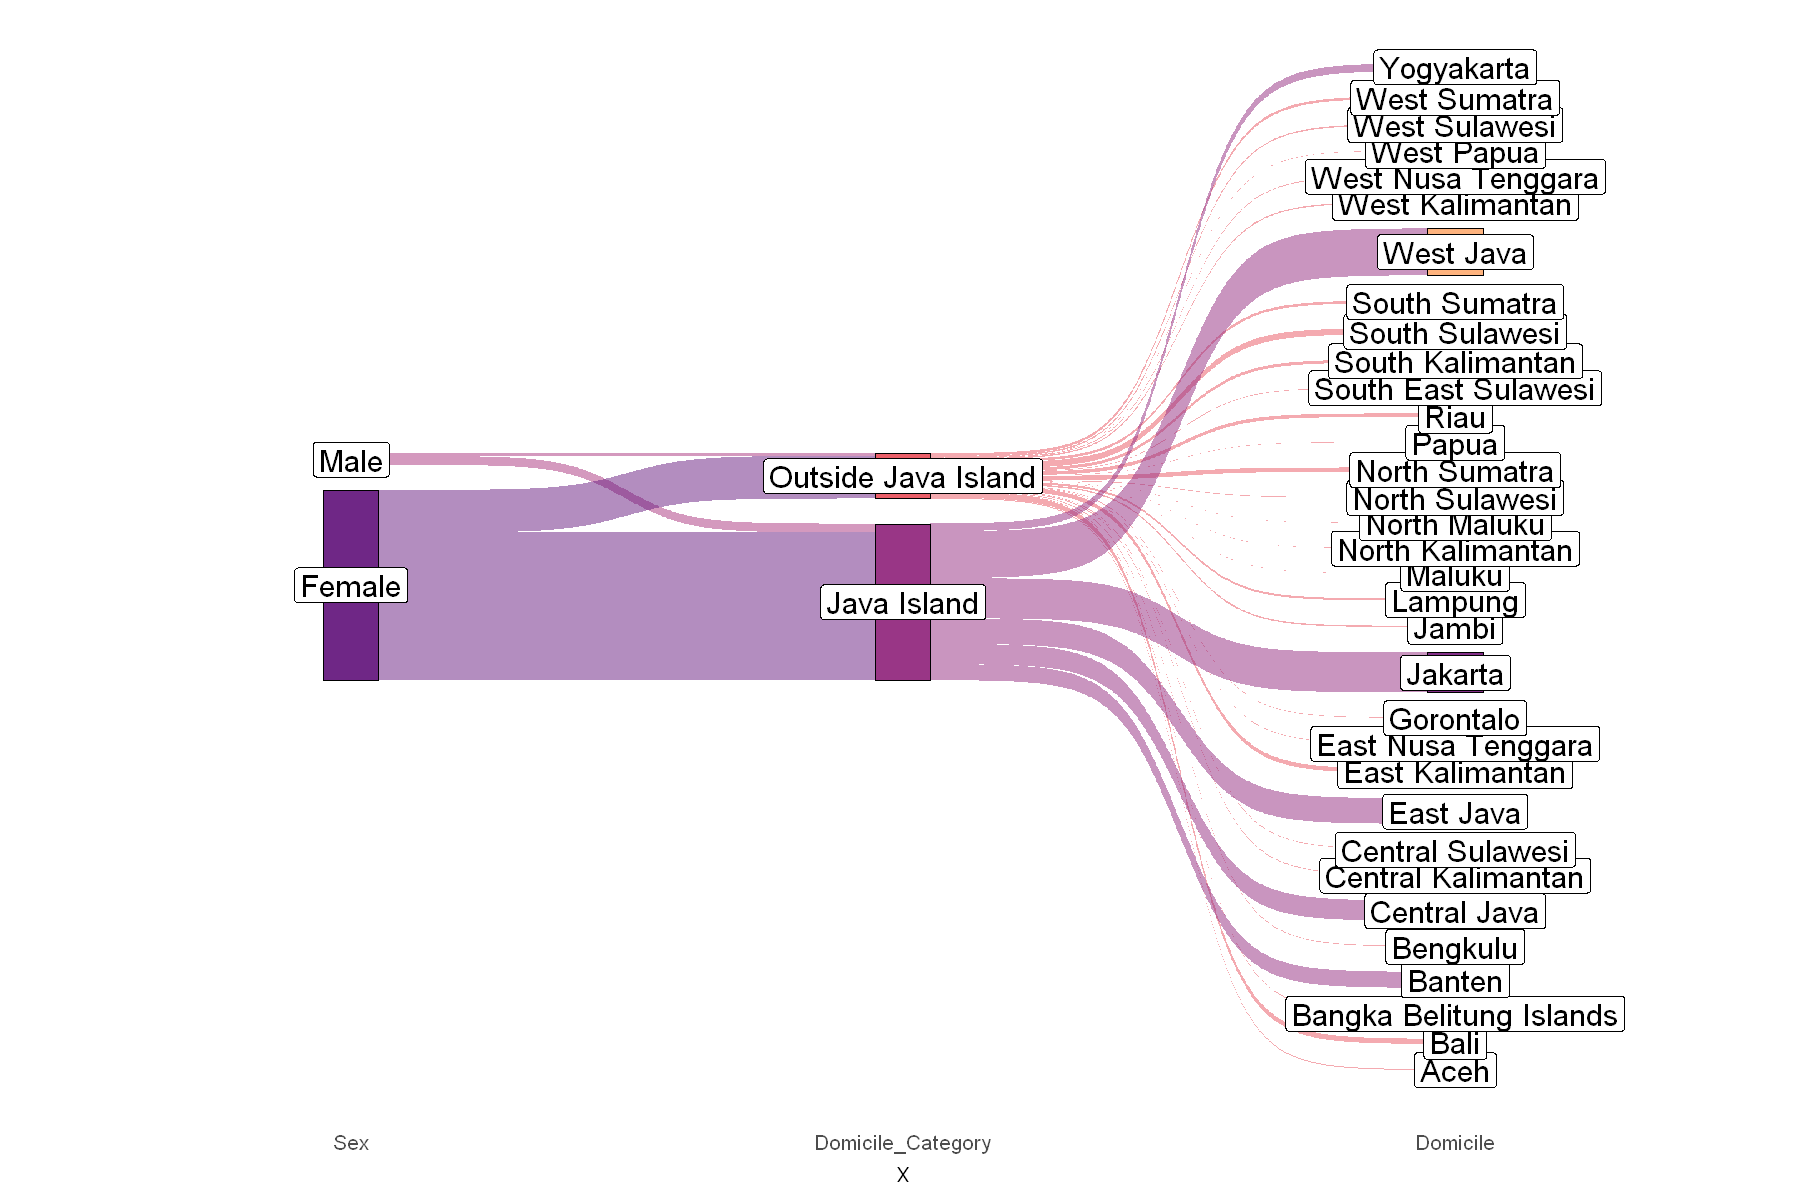

In [9]:
options(repr.plot.width=15, repr.plot.height=10)
df <- CWS %>%make_long(Sex, Domicile_Category, Domicile)
ggplot(df, aes(x = x,  next_x = next_x, node = node, next_node = next_node,fill = factor(node),label = node)) +
  geom_sankey(flow.alpha = 0.5, node.color = 1) + geom_sankey_label(size = 6.5, color = 1, fill = "white") +
  scale_fill_viridis_d(option = "A", alpha = 0.95) + theme_sankey(base_size = 16)+theme(legend.position = "none")

<font color='blue'>
<h4 align="left">
A lot of youngsters: The age distribution of respondents is centered around 18 to 21 years old.

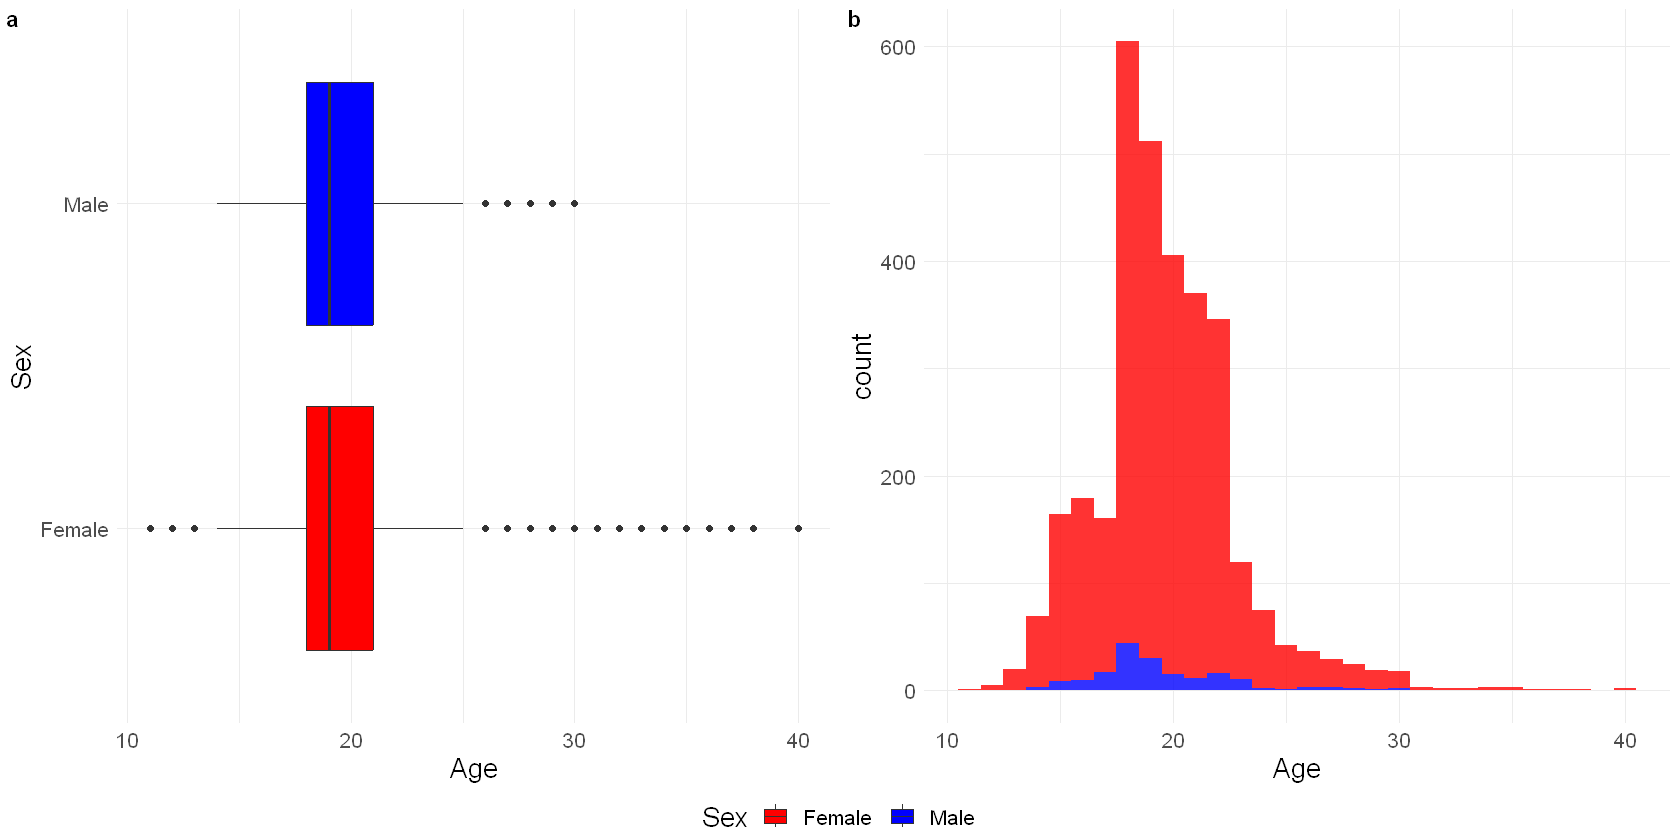

In [10]:
options(repr.plot.width=14, repr.plot.height=7)
a<- na.omit(CWS[, c(2, 3)]) %>% ggplot(aes(x=Sex, y=Age, fill=Sex)) + geom_boxplot() + 
coord_flip()+theme_minimal() + theme(text=element_text(size=16)) + scale_fill_manual(values=c( "red", "blue"))
b<- na.omit(CWS[, c(2, 3)]) %>% ggplot(aes(Age, fill=Sex)) + geom_histogram(alpha=0.8, bins = 30) + 
theme_minimal() + theme(text=element_text(size=16)) + scale_fill_manual(values=c( "red", "blue"))
ggarrange(a, b,nrow=1, ncol=2, labels=c("a","b"),common.legend = TRUE, legend = "bottom")

<font color='blue'>
<h4 align="left">
Insight: West Java, Jakarta, and East Java have the highest number of respondents, while South Sulawesi is the top domicile for respondents outside of Java.

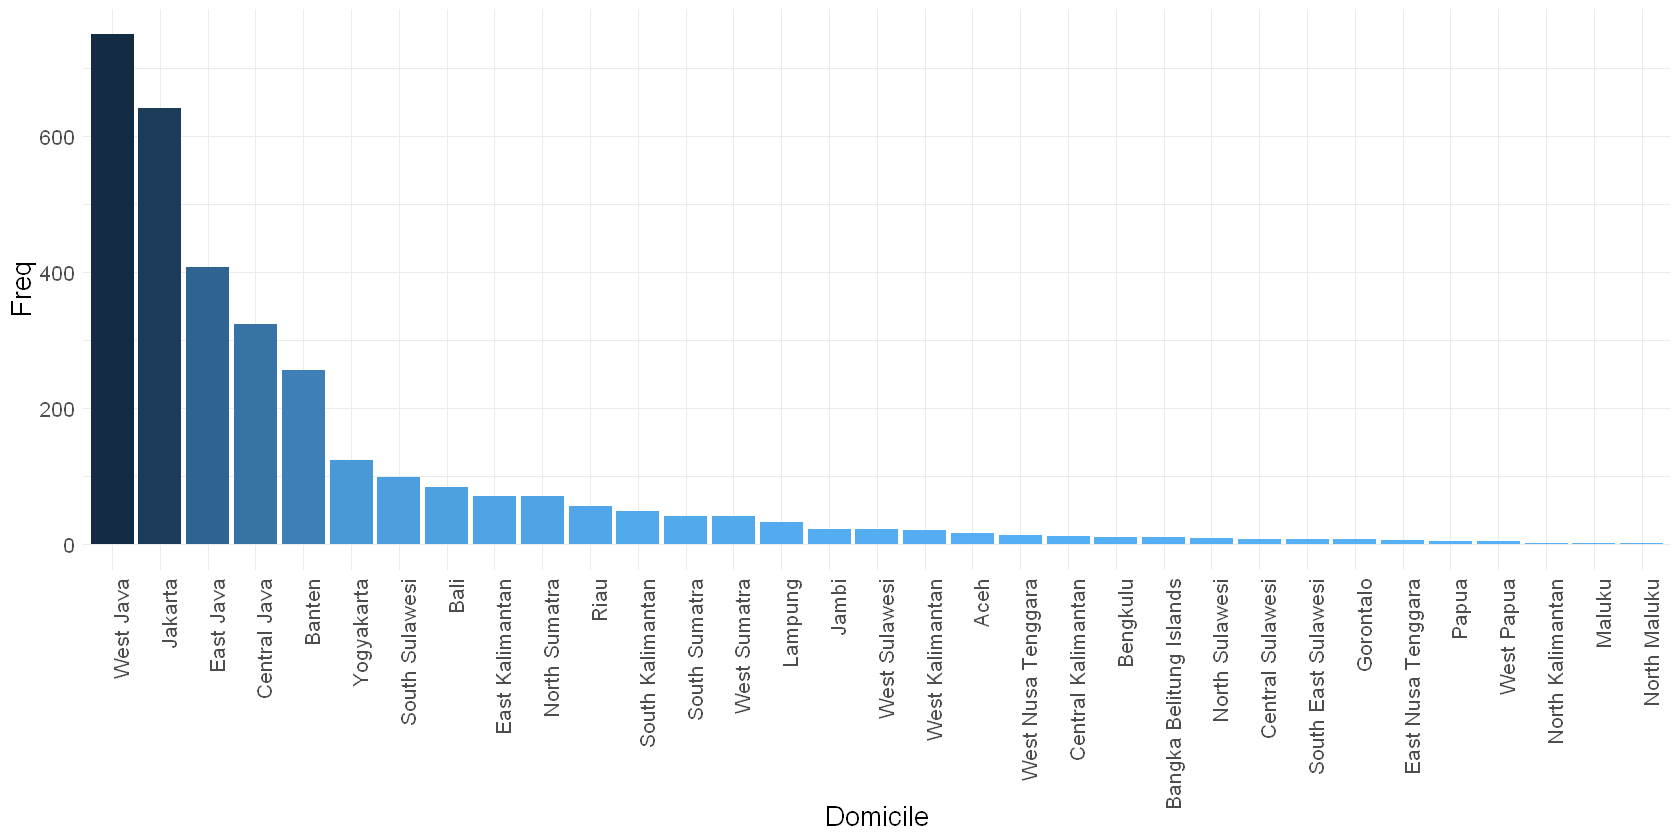

In [11]:
options(repr.plot.width=14, repr.plot.height=7)
data.frame(table(CWS$Domicile)) %>% mutate(Domicile  = fct_reorder(Var1, -Freq)) %>% 
ggplot(aes(Domicile, Freq, fill=-Freq)) + geom_col() + theme_minimal() + 
theme(text=element_text(size=16), legend.position = "none") +
theme(axis.text.x = element_text(angle = 90, vjust = 1, hjust=1))

## 1.3 Descriptive statistics by Sex

<font color='blue'>
<h4 align="left">
Insight: Both male and female respondents show a relatively low score for BP, as indicated by a high positive skew and and a relatively high score for ES, as indicated by a negative skew.

### 1.3.1 Female 

In [12]:
df_female<-round(data.frame(describeBy(CWS[, 6:31], group = CWS$Sex)$Female),2)
reactable(df_female, pagination = FALSE,static = getOption("reactable.static", TRUE),
          defaultColDef = colDef(cell = data_bars(df_female,fill_color = c("pink","red","darkred"))))

HTML widgets cannot be represented in plain text (need html)

### 1.3.2 Male

In [13]:
df_male<-round(data.frame(describeBy(CWS[, 6:31], group = CWS$Sex)$Male),2)
reactable(df_male, pagination = FALSE,static = getOption("reactable.static", TRUE),
          defaultColDef = colDef(cell = data_bars(df_male, fill_color = c("lightblue","royalblue","navy"))))

HTML widgets cannot be represented in plain text (need html)

<font color='blue'>
<h4 align="left">
Insight: Based on data visualization alone, female shows a relatively significant higher score than male in ES4, IP2, IP6, IP8, 
IP11, and IP12

 - ES4: I enjoy watching, reading, or listening to my favorite celebrity because it means a good time
 - IP2: One of the main reasons I maintain an interest in my favorite celebrity is that doing so gives me a temporary escape from life’s problems
 - IP6: When something bad happens to my favorite celebrity I feel like it happened to me
 - IP8: The successes of my favorite celebrity are my successes also
 - IP11: If someone gave me several thousand dollars to do with as I please, I would consider spending it on a personal possession (like a napkin or paper plate) once used by my favorite celebrity
 - IP12: When something good happens to my favorite celebrity I feel like it happened to me

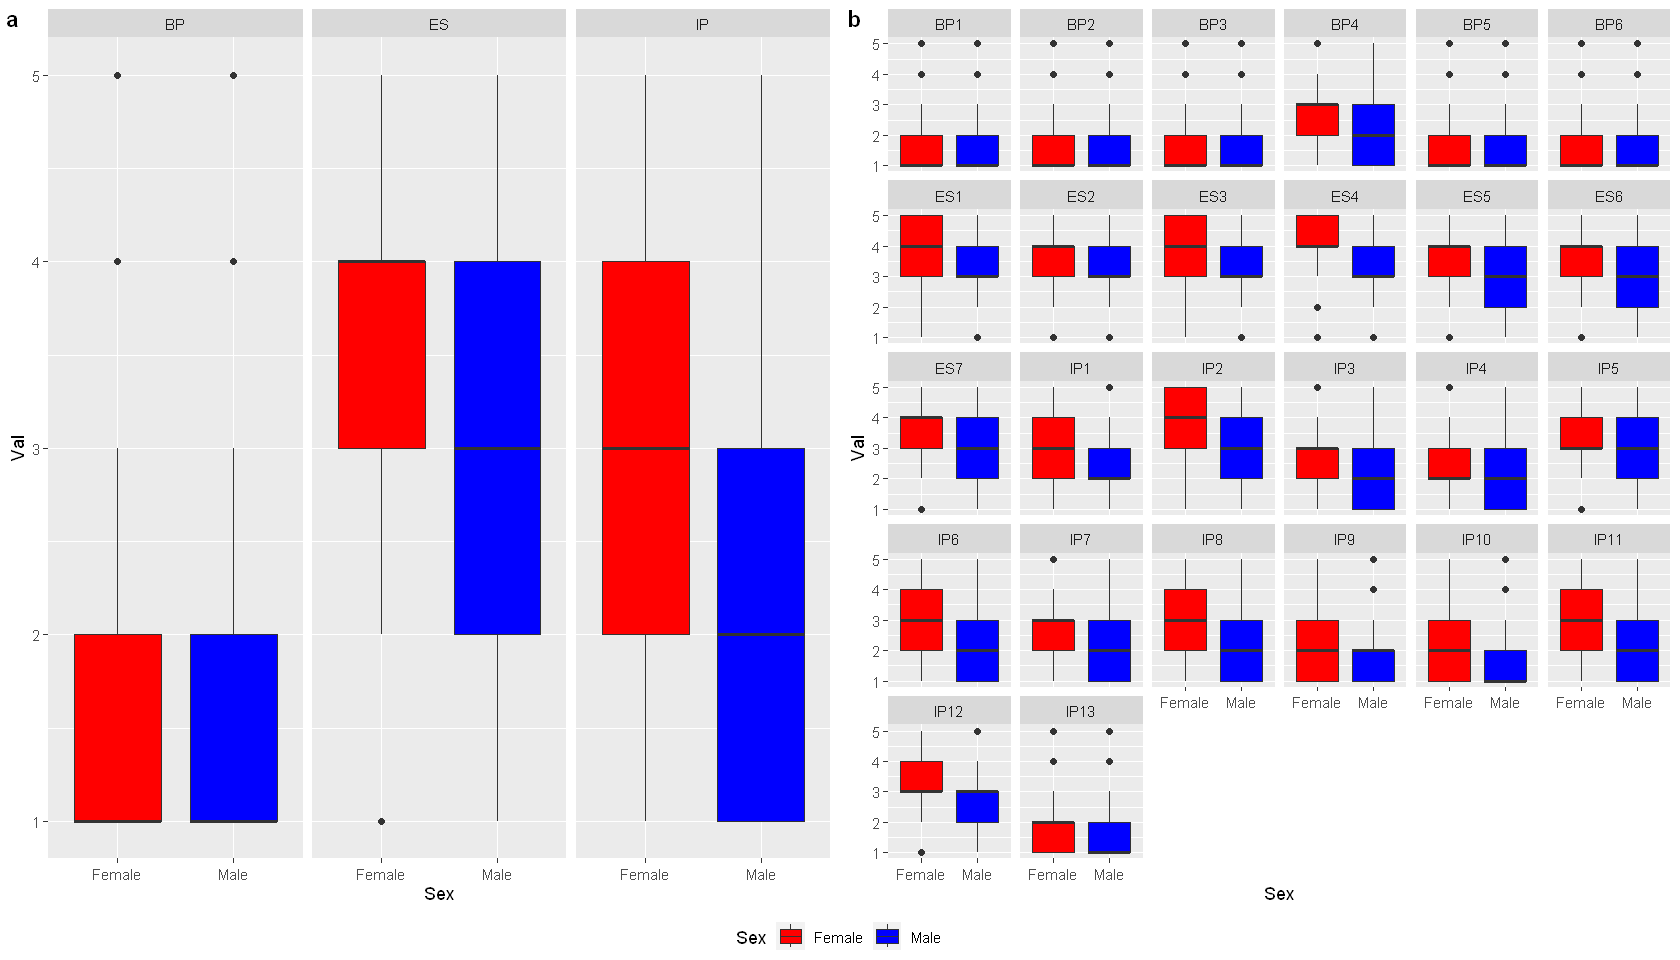

In [14]:
options(repr.plot.width=14, repr.plot.height=8 )
dat_sex <- CWS[, c(3,6:31)] %>% gather('Vars', 'Val', -Sex)  %>% mutate(Group=NA)  
dat_sex[grep('ES', dat_sex$Vars),'Latent' ] <- 'ES'
dat_sex[grep('IP', dat_sex$Vars),'Latent' ] <- 'IP'
dat_sex[grep('BP', dat_sex$Vars),'Latent' ] <- 'BP'
dat_sex$Vars <- factor(dat_sex$Vars, levels=names(CWS[, 6:31])[order(nchar(names(CWS[, 6:31])), names(CWS[, 6:31]))])
a<- dat_sex %>% ggplot(aes(y=Val, x=Sex, fill=Sex)) + geom_boxplot()+ facet_wrap(~Latent)+scale_fill_manual(values=c( "red", "blue"))
b<- dat_sex %>% ggplot(aes(y=Val, x=Sex, fill=Sex)) + geom_boxplot()+ facet_wrap(~Vars)+scale_fill_manual(values=c( "red", "blue"))
ggarrange(a, b,nrow=1, ncol=2, labels=c("a","b","c"),common.legend = TRUE, legend = "bottom")

## 1.4 Inferential Statistics by Sex

<font color='blue'>
<h4 align="left">
Insight: there are no significant differences between male and female respondents for most items in BP

In [15]:
central_test_by_sex <- sapply(CWS[, 6:length(CWS)], function(x){
    res <- t.test(x ~ CWS$Sex)
    res_non_param <- wilcox.test(x ~ CWS$Sex)
    round(data.frame(p_value_t_test=res$p.value, 
                     p_value_wilcox_test=res_non_param$p.value,
                     mean.Female = res$estimate[1], 
                     mean.Male=res$estimate[2],
                     median.Female = by(x, CWS$Sex, median)[1],
                     median.Male=by(x, CWS$Sex, median)[2]),3)
})
data.frame(t(central_test_by_sex))

p_value_t_test p_value_wilcox_test mean.Female mean.Male median.Female
ES1  0              0                   3.957       3.403     4            
ES2  0              0                   3.831       3.199     4            
ES3  0              0                   3.95        3.392     4            
ES4  0              0                   4.017       3.343     4            
ES5  0              0                   3.585       2.989     4            
ES6  0              0                   3.616       3.05      4            
ES7  0              0                   3.523       2.762     4            
IP1  0              0                   2.94        2.608     3            
IP2  0              0                   3.852       2.95      4            
IP3  0              0                   2.688       2.282     3            
IP4  0              0                   2.535       2.05      2            
IP5  0              0                   3.455       2.862     3            
IP6  0              0                   2.883       2.21      3            
IP7  0              0                   2.638       2.011     3            
IP8  0              0                   3.029       2.359     3            
IP9  0              0                   2.308       1.823     2            
IP10 0              0                   2.16        1.773     2            
IP11 0.002          0.003               2.679       2.398     3            
IP12 0              0                   3.248       2.536     3            
IP13 0.18           0.022               1.837       1.735     2            
BP1  0.865          0.244               1.536       1.525     1            
BP2  0.981          0.467               1.764       1.762     1            
BP3  0.17           0.221               1.578       1.685     1            
BP4  0              0                   2.772       2.182     3            
BP5  0.407          0.2                 1.664       1.608     1            
BP6  0.024          0.017               1.611       1.47      1            
     median.Male
ES1  3          
ES2  3          
ES3  3          
ES4  3          
ES5  3          
ES6  3          
ES7  3          
IP1  2          
IP2  3          
IP3  2          
IP4  2          
IP5  3          
IP6  2          
IP7  2          
IP8  2          
IP9  2          
IP10 1          
IP11 2          
IP12 3          
IP13 1          
BP1  1          
BP2  1          
BP3  1          
BP4  2          
BP5  1          
BP6  1

## 1.5 Descriptive statistics by Domicile_Category

<font color='blue'>
<h4 align="left">
Insight: the score of respondents from Java and outside of Java are roughly the same.

### 1.5.1 Java Island

In [16]:
df_java<-round(data.frame(describeBy(CWS[, 6:31], group = CWS$Domicile_Category)$'Java Island'),2)
reactable(df_java, pagination = FALSE,static = getOption("reactable.static", TRUE),
          defaultColDef = colDef(cell = data_bars(df_java,
                                                  fill_color = c("yellow","#E69F00","brown"))))

HTML widgets cannot be represented in plain text (need html)

In [17]:
df_out_java<-round(data.frame(describeBy(CWS[, 6:31], group = CWS$Domicile_Category)$'Outside Java Island'),2)
reactable(df_out_java, pagination = FALSE,static = getOption("reactable.static", TRUE),
          defaultColDef = colDef(cell = data_bars(df_out_java,
                                                  fill_color = c("lightgreen","green3","darkgreen"))))

HTML widgets cannot be represented in plain text (need html)

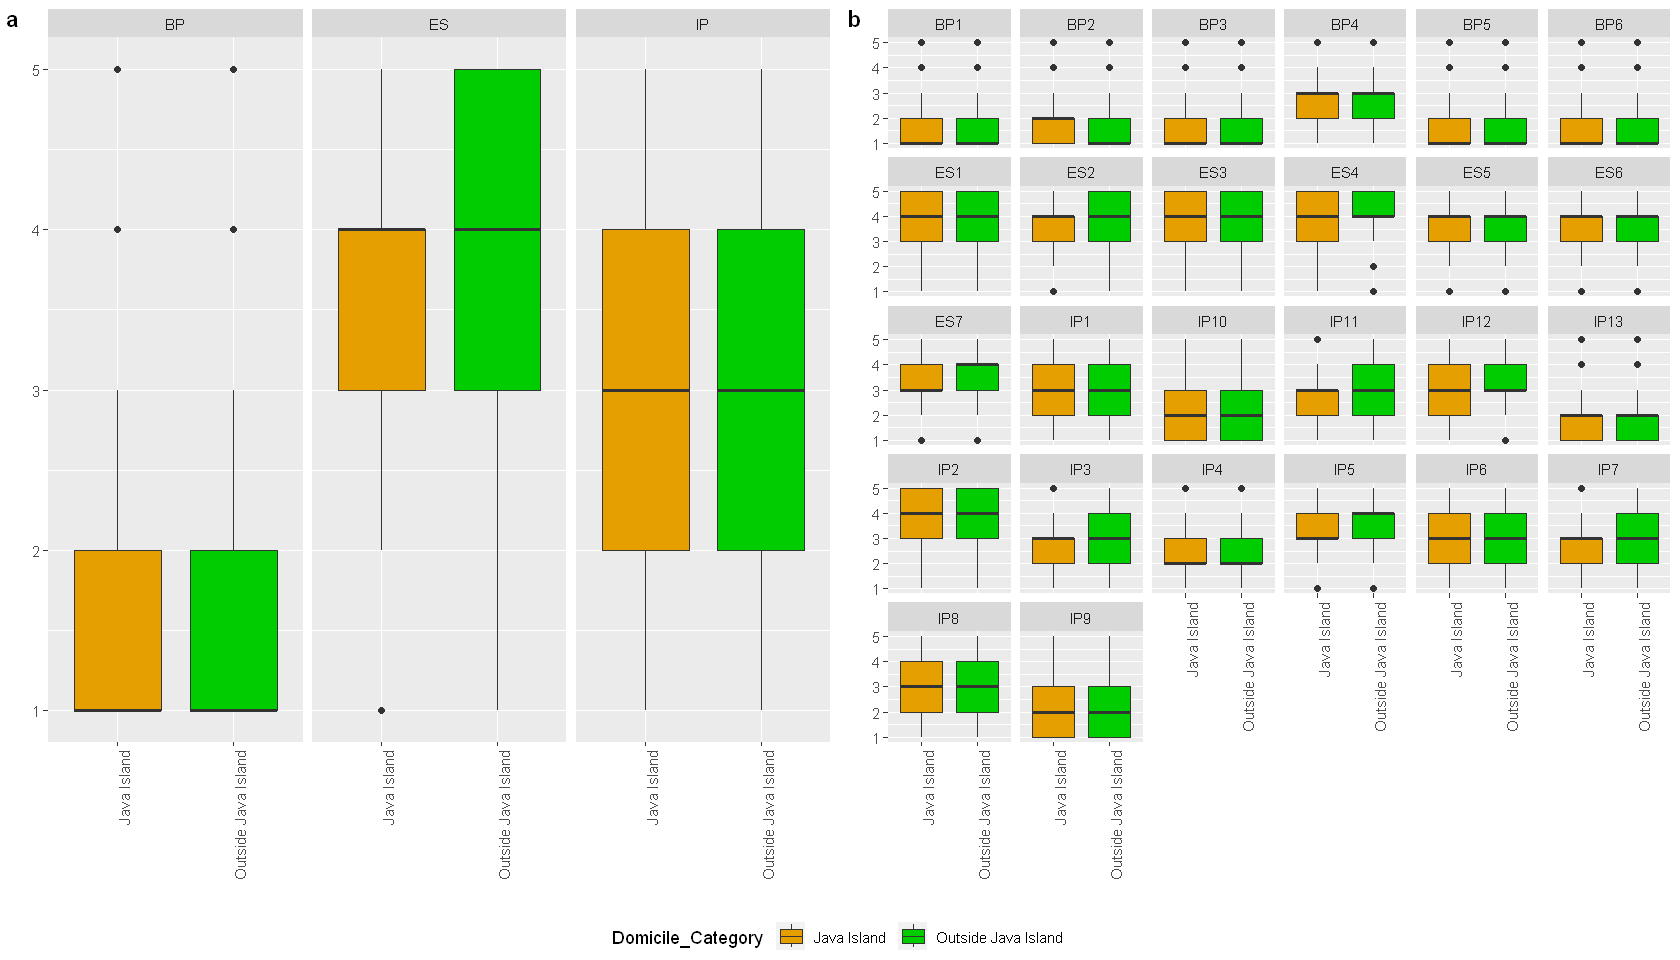

In [29]:
options(repr.plot.width=14, repr.plot.height=8 )
dat_dom <- CWS[, c(5,6:31)] %>% gather('Vars', 'Val', -Domicile_Category)  %>% mutate(Group=NA)  
dat_dom[grep('ES', dat_dom$Vars),'Group' ] <- 'ES'
dat_dom[grep('IP', dat_dom$Vars),'Group' ] <- 'IP'
dat_dom[grep('BP', dat_dom$Vars),'Group' ] <- 'BP'

a<- dat_dom %>% ggplot(aes(y=Val, x= Domicile_Category, fill= Domicile_Category)) + 
geom_boxplot()+ facet_wrap(~Group) + theme(axis.text.x = element_text(angle = 90, vjust = 1, hjust=1))+
scale_fill_manual(values=c( "#E69F00", "green3")) + labs(x='', y='')

b<- dat_dom %>% ggplot(aes(y=Val, x= Domicile_Category, fill= Domicile_Category)) + 
geom_boxplot()+ facet_wrap(~Vars) + theme(axis.text.x = element_text(angle = 90, vjust = 1, hjust=1))+
scale_fill_manual(values=c( "#E69F00", "green3")) + labs(x='', y='')


ggarrange(a, b,nrow=1, ncol=2, labels=c("a","b","c"),common.legend = TRUE, legend = "bottom")

## 1.6 Inferential Statistics by Domicile_Category

In [19]:
central_test_by_domicile <- sapply(CWS[, 6:length(CWS)], function(x){
    res <- t.test(x ~ CWS$Domicile_Category)
    res_non_param <- wilcox.test(x ~ CWS$Domicile_Category)
    round(data.frame(p_value_t_test=res$p.value, 
                     p_value_wilcox_test=res_non_param$p.value,
                     mean.Java = res$estimate[1], 
                     mean.OutJava=res$estimate[2],
                     median.Java = by(x, CWS$Domicile_Category, median)[1],
                     median.OutJava=by(x, CWS$Domicile_Category, median)[2]),3)
})
data.frame(t(central_test_by_domicile))

p_value_t_test p_value_wilcox_test mean.Java mean.OutJava median.Java
ES1  0.005          0.001               3.901     4.012        4          
ES2  0.002          0.002               3.769     3.889        4          
ES3  0.017          0.003               3.897     3.992        4          
ES4  0.008          0.001               3.956     4.06         4          
ES5  0.031          0.021               3.532     3.621        4          
ES6  0.004          0.002               3.557     3.677        4          
ES7  0              0                   3.446     3.601        3          
IP1  0.02           0.011               2.898     3            3          
IP2  0.06           0.021               3.782     3.87         4          
IP3  0.002          0.002               2.633     2.775        3          
IP4  0.235          0.23                2.495     2.551        2          
IP5  0.045          0.039               3.403     3.487        3          
IP6  0.001          0.001               2.811     2.963        3          
IP7  0.003          0.004               2.57      2.717        3          
IP8  0.038          0.022               2.97      3.068        3          
IP9  0.003          0.002               2.25      2.387        2          
IP10 0.004          0.002               2.107     2.245        2          
IP11 0.297          0.345               2.651     2.705        3          
IP12 0.011          0.004               3.181     3.301        3          
IP13 0.124          0.257               1.817     1.879        2          
BP1  0.009          0.024               1.515     1.609        1          
BP2  0.467          0.951               1.757     1.788        2          
BP3  0.36           0.168               1.592     1.556        1          
BP4  0.287          0.203               2.728     2.777        3          
BP5  0.382          0.416               1.654     1.687        1          
BP6  0.577          0.589               1.599     1.62         1          
     median.OutJava
ES1  4             
ES2  4             
ES3  4             
ES4  4             
ES5  4             
ES6  4             
ES7  4             
IP1  3             
IP2  4             
IP3  3             
IP4  2             
IP5  4             
IP6  3             
IP7  3             
IP8  3             
IP9  2             
IP10 2             
IP11 3             
IP12 3             
IP13 2             
BP1  1             
BP2  1             
BP3  1             
BP4  3             
BP5  1             
BP6  1

## 1.7 ANOVA and G-Study

In [20]:
CWSlong <- CWS[, c(3, 5, 6:31)] %>% mutate(Person=CWS[,1]) %>% gather('Item', 'Value', -Person, -Sex, -Domicile_Category)  %>% 
mutate(Item=factor(Item))
summary(CWSlong)

     Sex                  Domicile_Category     Person           Item      
 Female:79092   Java Island        :65052   1      :   26   BP1    : 3223  
 Male  : 4706   Outside Java Island:18746   2      :   26   BP2    : 3223  
                                            3      :   26   BP3    : 3223  
                                            4      :   26   BP4    : 3223  
                                            5      :   26   BP5    : 3223  
                                            6      :   26   BP6    : 3223  
                                            (Other):83642   (Other):64460  
     Value      
 Min.   :1.000  
 1st Qu.:2.000  
 Median :3.000  
 Mean   :2.808  
 3rd Qu.:4.000  
 Max.   :5.000  
                

### 1.7.1 One-facet design

<font color='blue'>
<h4 align="left">
Insight: Items are great measures as it indicates that there is a larger variance among items compared to the variance among individuals. This suggests that items have the ability to differentiate individuals.

#### a. ANOVA

In [21]:
summary(aov(Value~Item, data = CWSlong))

               Df Sum Sq Mean Sq F value Pr(>F)    
Item           25  54277    2171    2119 <2e-16 ***
Residuals   83772  85845       1                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

#### b. G-Study

In [22]:
formula1 <- Value ~ (1|Person)+(1|Item) 
g1 <- gstudy(data = CWSlong, formula1)
g1

$components
    source       var percent n
1   Person 0.3576338    21.1 1
2     Item 0.6734075    39.7 1
3 Residual 0.6671088    39.3 1

attr(,"class")
[1] "gstudy" "list"

### 1.7.2 Multi-facet Design

#### a. ANOVA

<font color='blue'>
<h4 align="left">
Insight: There is more variance in the sex category compared to the domicile category, indicating that there is greater distribution among individuals in terms of their sex compared to their place of domicile.

In [23]:
summary(aov(Value~Item*Sex*Domicile_Category, data = CWSlong))

                              Df Sum Sq Mean Sq  F value  Pr(>F)    
Item                          25  54277  2171.1 2151.356 < 2e-16 ***
Sex                            1    898   897.9  889.753 < 2e-16 ***
Domicile_Category              1    119   119.2  118.115 < 2e-16 ***
Item:Sex                      25    308    12.3   12.218 < 2e-16 ***
Item:Domicile_Category        25     30     1.2    1.203 0.22186    
Sex:Domicile_Category          1      8     7.8    7.680 0.00558 ** 
Item:Sex:Domicile_Category    25     21     0.8    0.815 0.72683    
Residuals                  83694  84461     1.0                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

#### b. G-Study

In [24]:
formula2 <- Value ~ (1|Person)+(1|Item) +(1|Sex) +(1|Domicile_Category)
g2 <- gstudy(data = CWSlong, formula2)
g2

Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
"Model failed to converge with max|grad| = 0.00826099 (tol = 0.002, component 1)"


$components
             source         var percent n
1            Person 0.345720428    19.3 1
2              Item 0.673591596    37.6 1
3               Sex 0.100694478     5.6 1
4 Domicile_Category 0.003767861     0.2 1
5          Residual 0.667108849    37.3 1

attr(,"class")
[1] "gstudy" "list"

<div class="alert-info">
<font color='blue'>
<h3 align="center">
~ 

# 2. Cluster Analysis of Item Questionnaire

<font color='blue'>
<h4 align="left">
Insight: all ES items exhibit a similar pattern

 - ES1: I love to talk with others who admire my favorite celebrity
 - ES2: Keeping up with news about my favorite celebrity is an entertaining pass-time
 - ES3: It is enjoyable just to be with others who like my favorite celebrity
 - ES4: I enjoy watching, reading, or listening to my favorite celebrity because it means a good time
 - ES5: Learning the life story of my favorite celebrity is a lot of fun
 - ES6: I like watching and hearing about my favorite celebrity when I am in a large group of people
 - ES7: My friends and I like to discuss what my favorite celebrity has done

<font color='blue'>
<h4 align="left">
Insight: BP4 exhibits different pattern compared to the other BP items.

 - BP1: I would gladly die in order to save the life of my favorite celebrity
 - BP2: If I were lucky enough to meet my favorite celebrity, and he/she asked me to do something illegal as a favor, I would probably do it
 - BP3: If I walked through the door of my favorite celebrity's home without an invitation she or he would be happy to see me
 - **BP4: I have frequent thoughts about my favorite celebrity, even when I don’t want to**
 - BP5: My favorite celebrity would immediately come to my rescue if I needed help
 - BP6: My favorite celebrity and I have our own code so we can communicate with each other secretly (such as over the TV or special words on the radio)

## 2.1 Item Questionnaire Visualization

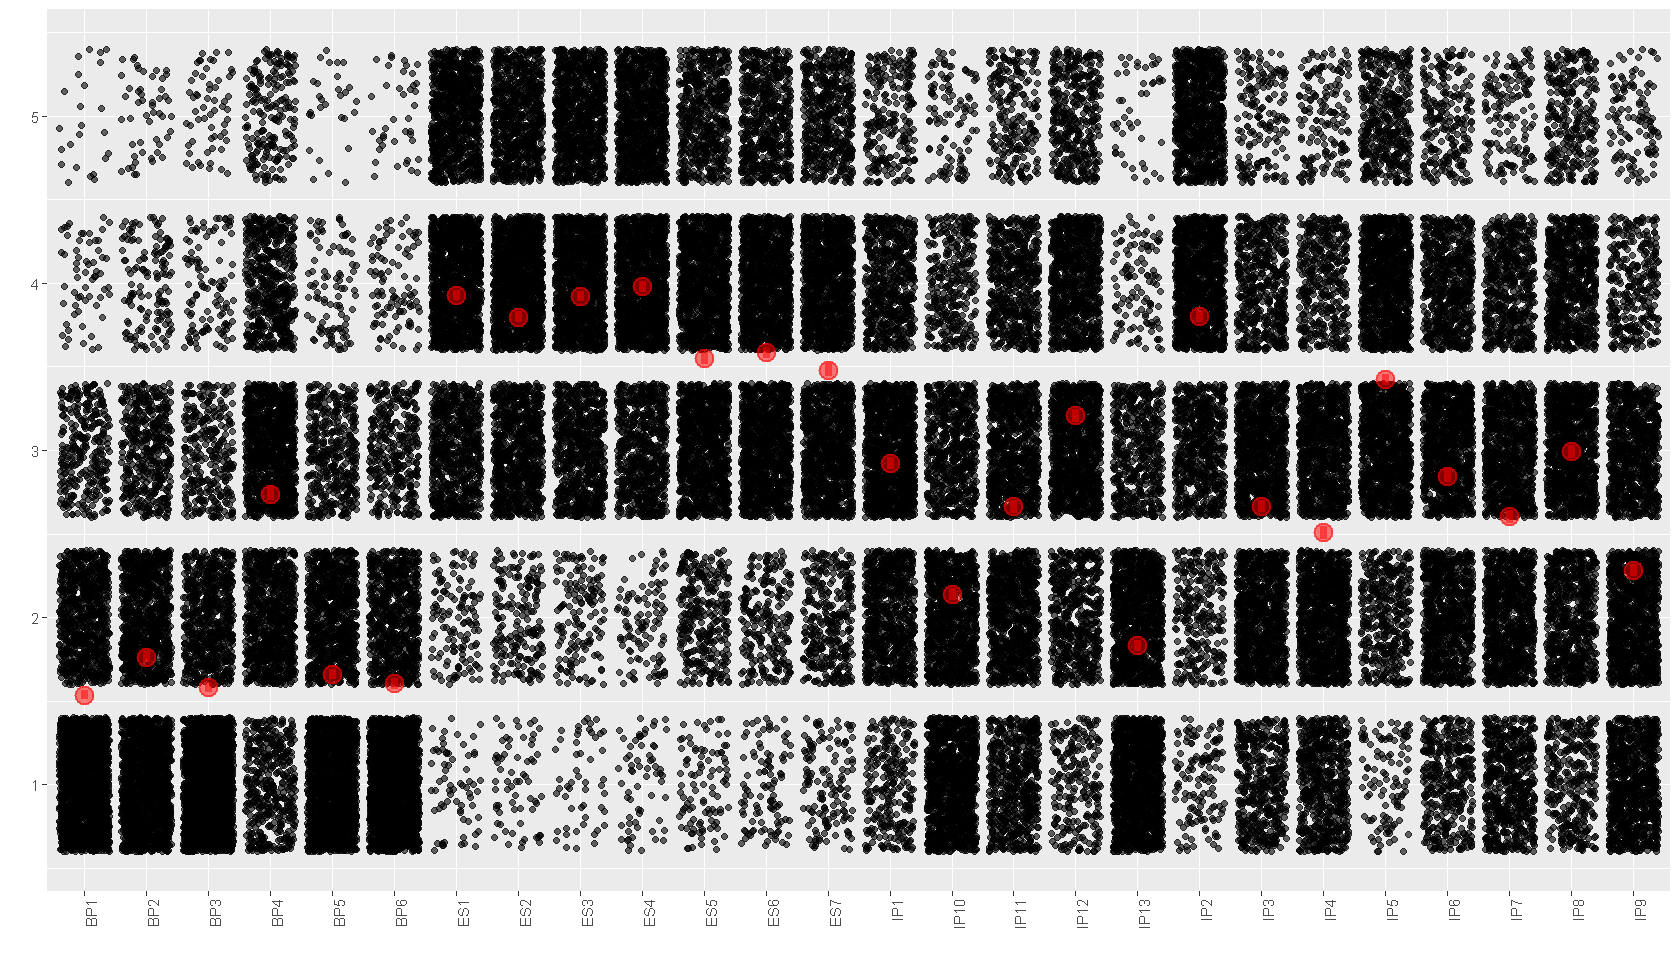

In [31]:
options(repr.plot.width=14, repr.plot.height=8 )
CWS[, 6:31] %>% gather('Vars', 'Val')  %>% ggplot(aes(Vars, Val)) +geom_jitter(alpha=0.6)+
stat_summary(fun.data = "mean_cl_boot", colour = "red", linewidth = 2, size = 1.2, alpha=0.5)+
theme(axis.text.x = element_text(angle = 90, vjust = 1, hjust=1)) + labs(x='', y='')

## 2.2 Principal Component Analysis

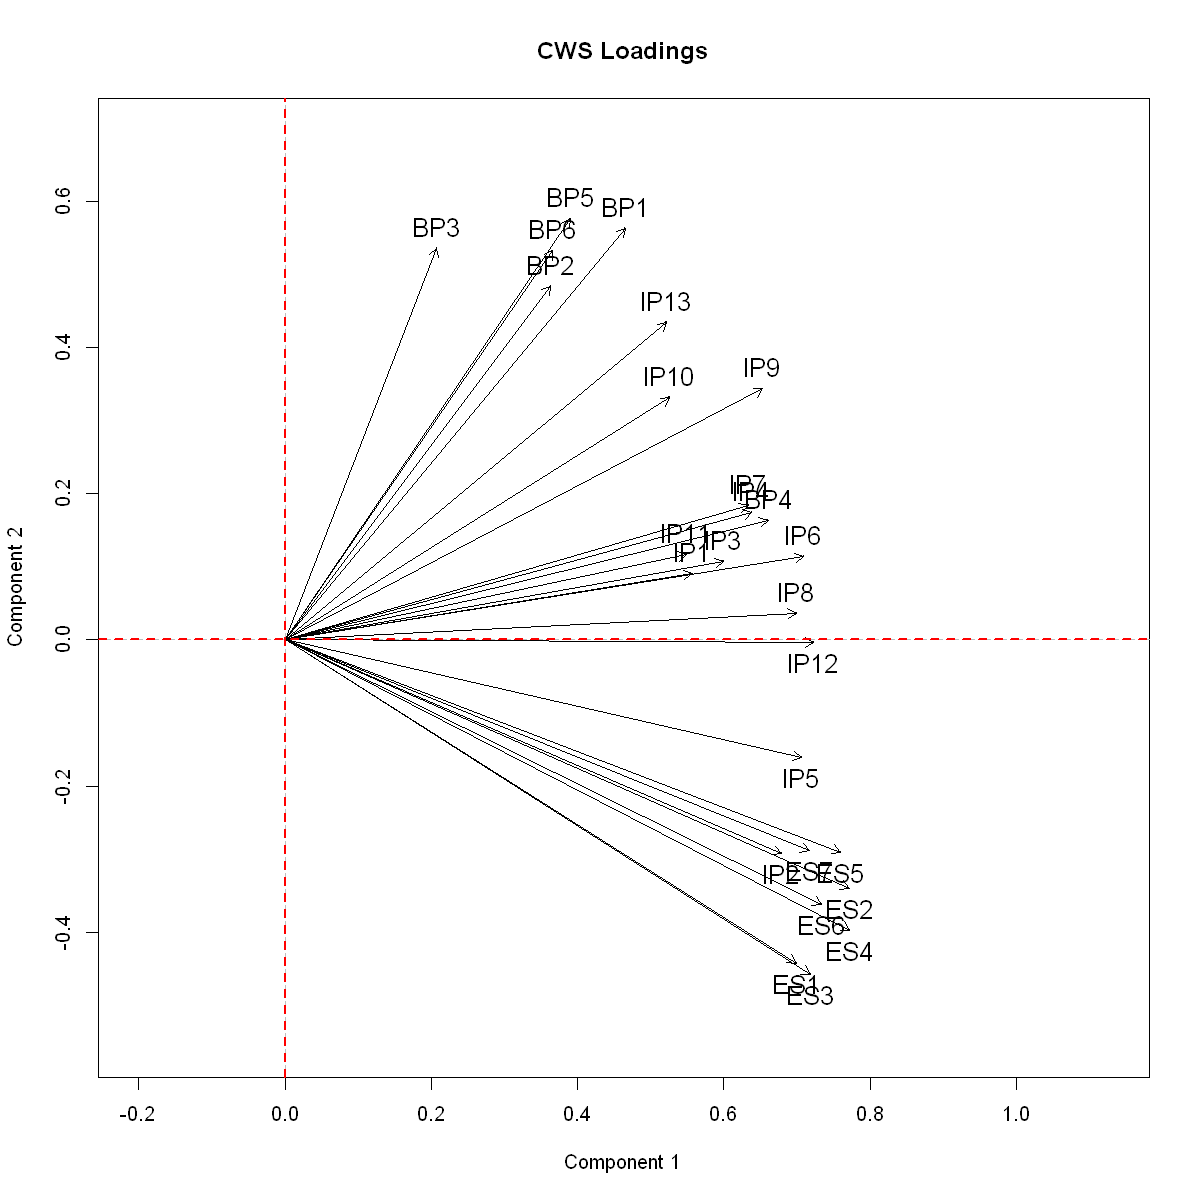

In [32]:
options(repr.plot.width=10, repr.plot.height=10)
prinCWS <- princals(CWS[, 6:31])
plot(prinCWS, main = "CWS Loadings", cex.scores=2,cex.loadings=1.3, lwd=6)
abline(v=0, lwd=2, col='red', lty='dashed');abline(h=0, lwd=2, col='red', lty='dashed')

## 2.3 Polychoric Correlation 

### 2.3.1 Spherical representation

<font color='blue'>
<h4 align="left">
Insight: IP items are relatively more spread out, indicating a greater variability scores.


- IP1: If I were to meet my favorite celebrity in person, he/she would already somehow know that I am his/her biggest fan
 - IP2: One of the main reasons I maintain an interest in my favorite celebrity is that doing so gives me a temporary escape from life’s problems
 - IP3: My favorite celebrity is practically perfect in every way
 - IP4: I share with my favorite celebrity a special bond that cannot be described in words
 - IP5: To know my favorite celebrity is to love him/her
 - IP6: When something bad happens to my favorite celebrity I feel like it happened to me
 - IP7: When my favorite celebrity fails or loses at something I feel like a failure myself
 - IP8: The successes of my favorite celebrity are my successes also
 - IP9: I consider my favorite celebrity to be my soulmate
 - IP10: When my favorite celebrity dies (or died) I will feel (or I felt) like dying too
 - IP11: If someone gave me several thousand dollars to do with as I please, I would consider spending it on a personal possession (like a napkin or paper plate) once used by my favorite celebrity
 - IP12: When something good happens to my favorite celebrity I feel like it happened to me
 - IP13: I am obsessed by details of my favorite celebrity’s life

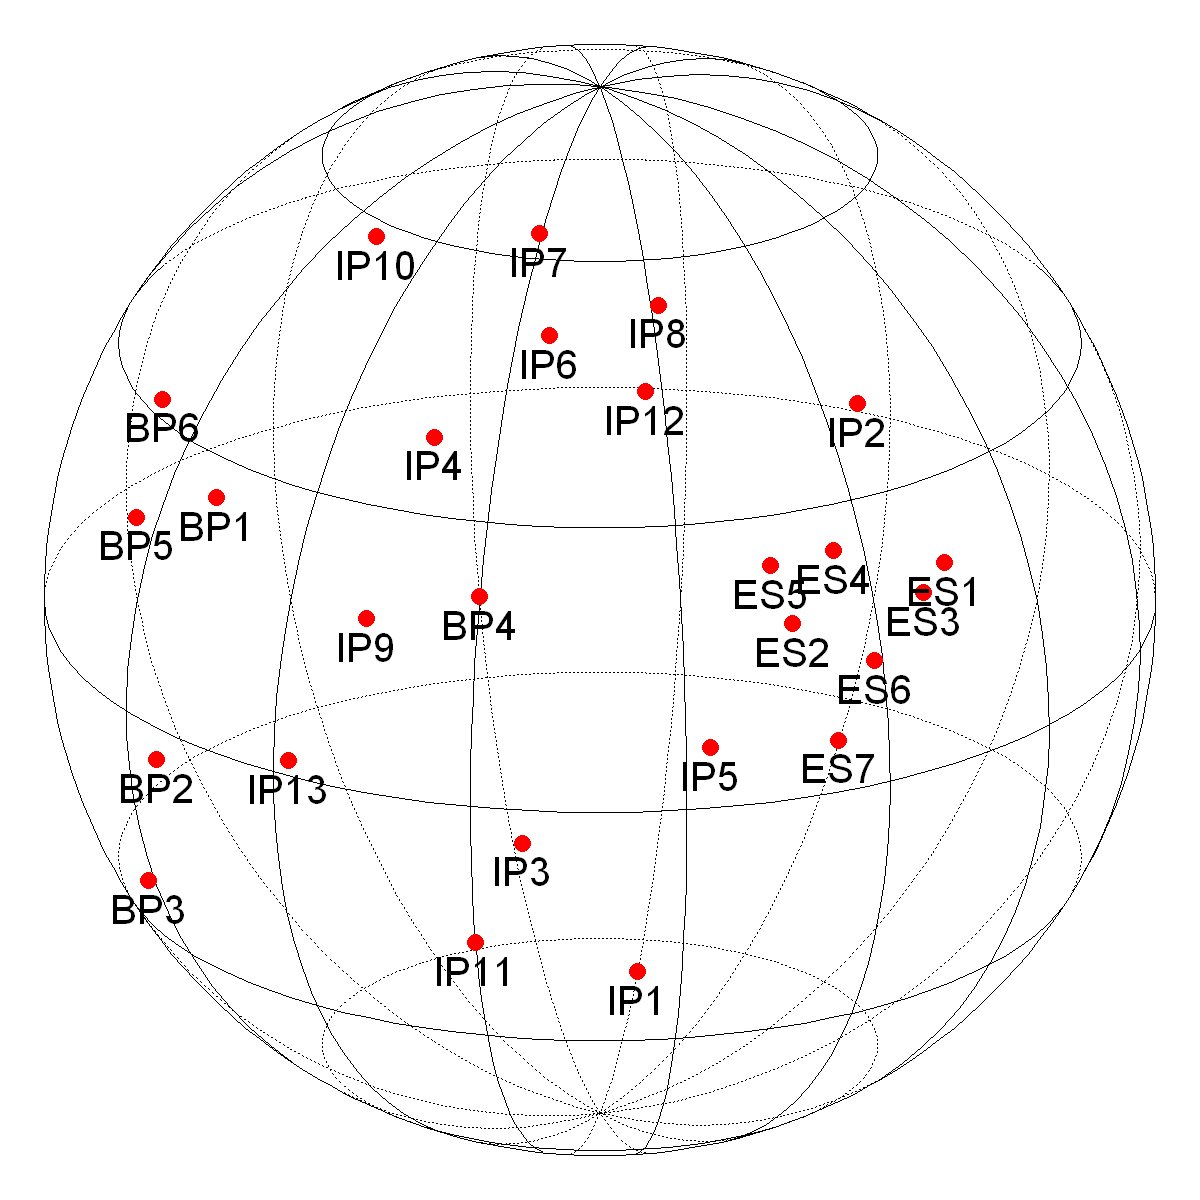

In [33]:
options(repr.plot.width=10, repr.plot.height=10)
cordata <- as.data.frame(polychoric(CWS[, 6:31])$rho)
sphpca(cordata,method="rscal",input="Cor",h=180,f=180,nbsphere=1,back=TRUE, cx = 2)

### 2.3.2 Hierarchical agglomerative clustering

<font color='blue'>
<h4 align="left">
Insight: all items show a positive correlation with each other.

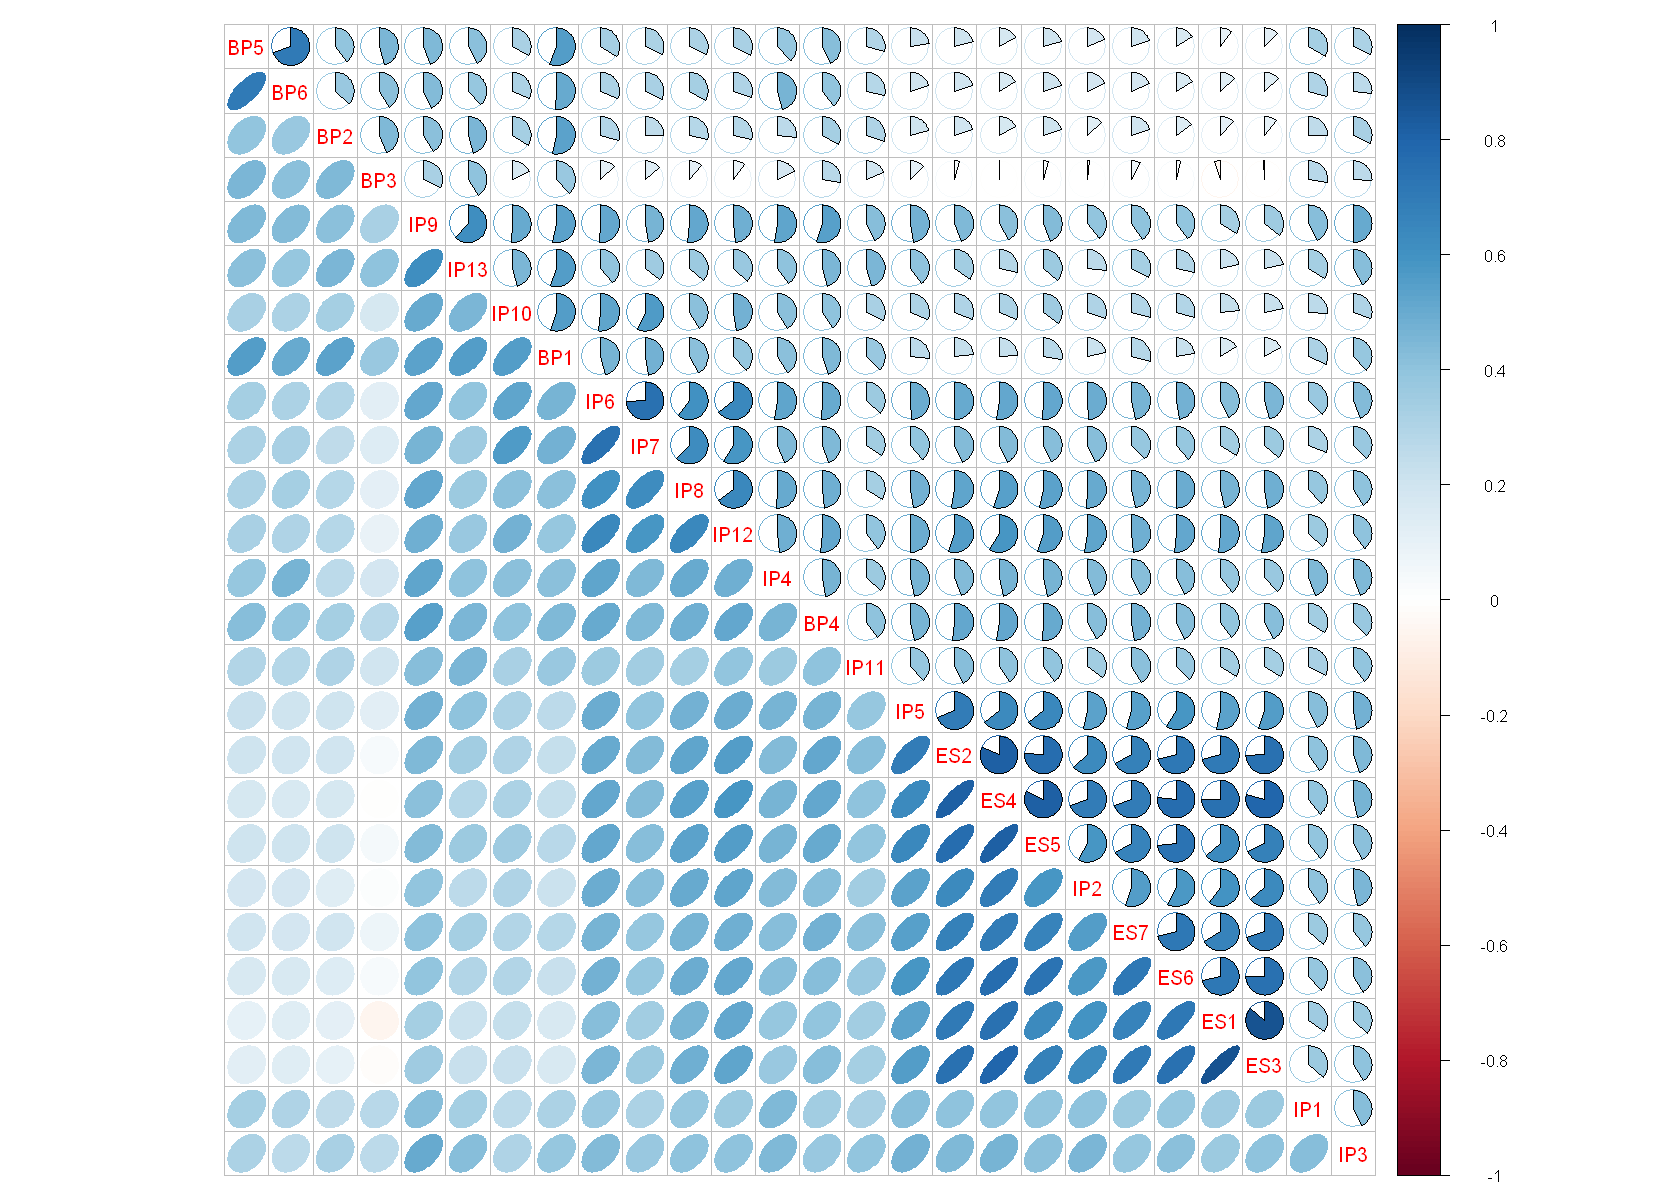

In [34]:
options(repr.plot.width=14, repr.plot.height=10)
corrplot.mixed(as.matrix(cordata), lower = 'ellipse', upper = 'pie', order = 'hclust')

<div class="alert-info">
<font color='blue'>
<h3 align="center">
~ 

# 3. Suitability of Factor Analysis

Is the data suitable for Factor Analysis?

## 3.1 KMO and Bartlet’s test

### 3.1.1 KMO test

<font color='blue'>
<h4 align="left">
Insight: The Kaiser, Meyer, Olkin (KMO) overall measure of sampling adequacy suggests that data seems appropriate for factor analysis (KMO > 0.8)

In [35]:




kmo_bartlet <-check_factorstructure(CWS[, 6:31])

In [36]:


kmo_bartlet$KMO$MSA

[1] 0.9553999

<font color='blue'>
<h4 align="left">
Insight: No variables were excluded from the analysis (individual KMO > 0.5)

In [37]:
data.frame(individual_KMO = kmo_bartlet$KMO$MSA_variable)

individual_KMO
ES1  0.9315036     
ES2  0.9679860     
ES3  0.9284681     
ES4  0.9563069     
ES5  0.9644129     
ES6  0.9708925     
ES7  0.9753070     
IP1  0.9734670     
IP2  0.9788690     
IP3  0.9694756     
IP4  0.9694103     
IP5  0.9738055     
IP6  0.9478348     
IP7  0.9226157     
IP8  0.9658539     
IP9  0.9644384     
IP10 0.9477073     
IP11 0.9774287     
IP12 0.9721988     
IP13 0.9461569     
BP1  0.9385645     
BP2  0.9310417     
BP3  0.8777455     
BP4  0.9800422     
BP5  0.8888448     
BP6  0.8778814

### 3.1.2 Sphericity

<font color='blue'>
<h4 align="left">
Insight: Bartlett's test of sphericity suggests that there is sufficient significant correlation in the data for factor analysis (Chisq(55) = 44593.9, p < .001).

In [38]:
kmo_bartlet$sphericity

# Test of Sphericity

Bartlett's test of sphericity suggests that there is sufficient significant correlation in the data for factor analysis (Chisq(325) = 44593.89, p < .001).

## 3.2 Univariate (Shapiro-Wilk) and multivariate (Henze-Zirkler) test of normal distribution

In [39]:
result <- mvn(data = CWS[, 6:31], mvnTest ='hz', univariateTest ='SW', desc = TRUE)
result$univariateNormality

Test         Variable  Statistic p value   Normality
1  Shapiro-Wilk    ES1       0.8498  <0.001      NO    
2  Shapiro-Wilk    ES2       0.8694  <0.001      NO    
3  Shapiro-Wilk    ES3       0.8544  <0.001      NO    
4  Shapiro-Wilk    ES4       0.8389  <0.001      NO    
5  Shapiro-Wilk    ES5       0.8931  <0.001      NO    
6  Shapiro-Wilk    ES6       0.8859  <0.001      NO    
7  Shapiro-Wilk    ES7       0.8969  <0.001      NO    
8  Shapiro-Wilk    IP1       0.9105  <0.001      NO    
9  Shapiro-Wilk    IP2       0.8596  <0.001      NO    
10 Shapiro-Wilk    IP3       0.9094  <0.001      NO    
11 Shapiro-Wilk    IP4       0.9000  <0.001      NO    
12 Shapiro-Wilk    IP5       0.9006  <0.001      NO    
13 Shapiro-Wilk    IP6       0.9160  <0.001      NO    
14 Shapiro-Wilk    IP7       0.9071  <0.001      NO    
15 Shapiro-Wilk    IP8       0.9171  <0.001      NO    
16 Shapiro-Wilk    IP9       0.8785  <0.001      NO    
17 Shapiro-Wilk   IP10       0.8499  <0.001      NO    
18 Shapiro-Wilk   IP11       0.9076  <0.001      NO    
19 Shapiro-Wilk   IP12       0.9131  <0.001      NO    
20 Shapiro-Wilk   IP13       0.8003  <0.001      NO    
21 Shapiro-Wilk    BP1       0.6875  <0.001      NO    
22 Shapiro-Wilk    BP2       0.7681  <0.001      NO    
23 Shapiro-Wilk    BP3       0.6710  <0.001      NO    
24 Shapiro-Wilk    BP4       0.9126  <0.001      NO    
25 Shapiro-Wilk    BP5       0.7417  <0.001      NO    
26 Shapiro-Wilk    BP6       0.7008  <0.001      NO

In [40]:
result$multivariateNormality

Test          HZ       p value MVN
1 Henze-Zirkler 1.123688 0       NO


<div class="alert-info">
<font color='blue'>
<h3 align="center">
~ 

# 4. Questionaire Analysis for Each Factor




# 4.1 BP


 - BP1: I would **gladly die** in order to save the life of my favorite celebrity
 - BP2: If I were lucky enough to meet my favorite celebrity, and he/she asked me to do something **illegal** as a favor, I would probably do it
 - BP3: If I walked through the door of my favorite celebrity's home without an invitation she or he would be happy to see me
 - BP4: I have frequent thoughts about my favorite celebrity, even when I don’t want to
 - BP5: My favorite celebrity would immediately **come to my rescue** if I needed help
 - BP6: My favorite celebrity and I have **our own code** so we can communicate with each other secretly (such as over the TV or special words on the radio)

### 4.1.1 Pairplot of BP 

<font color='blue'>
<h4 align="left">
Insight: BP1 and BP2 are strongly correlated, as are BP5 and BP6. BP3 shows very low correlation with other BP items

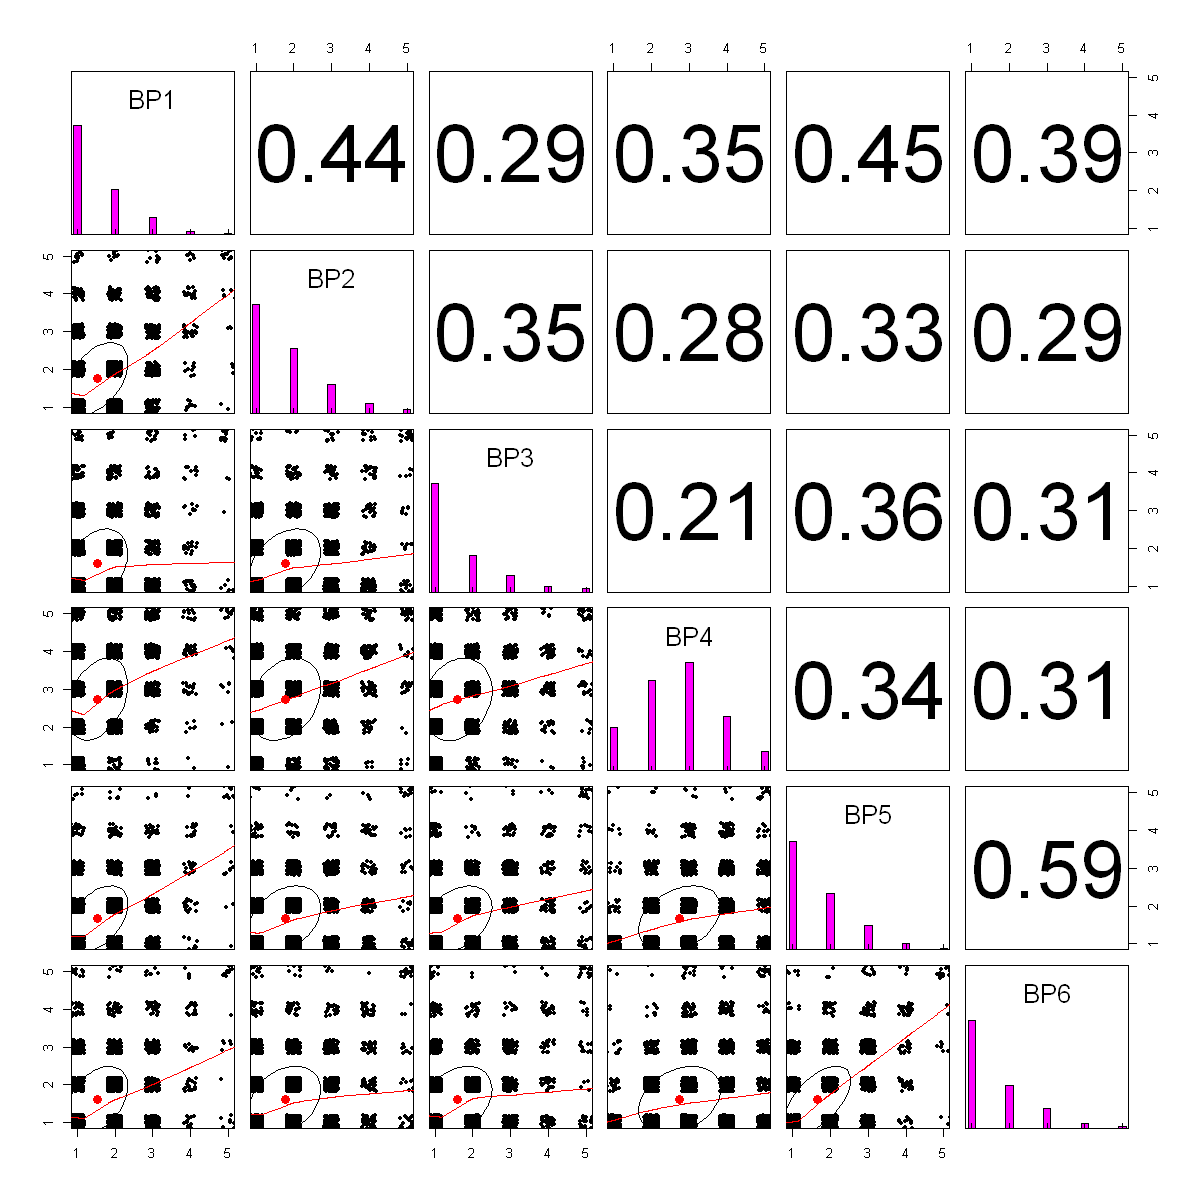

In [41]:
options(repr.plot.width=10, repr.plot.height=10)
BP<- CWS[, grep('BP',names(CWS))]
BP %>% pairs.panels(show.point=T, method='pearson',
                    density=F, jiggle=T, factor=0.9,
                    hist.col='magenta', cex.cor=3)

### 4.1.2 PCA Loadings of BP

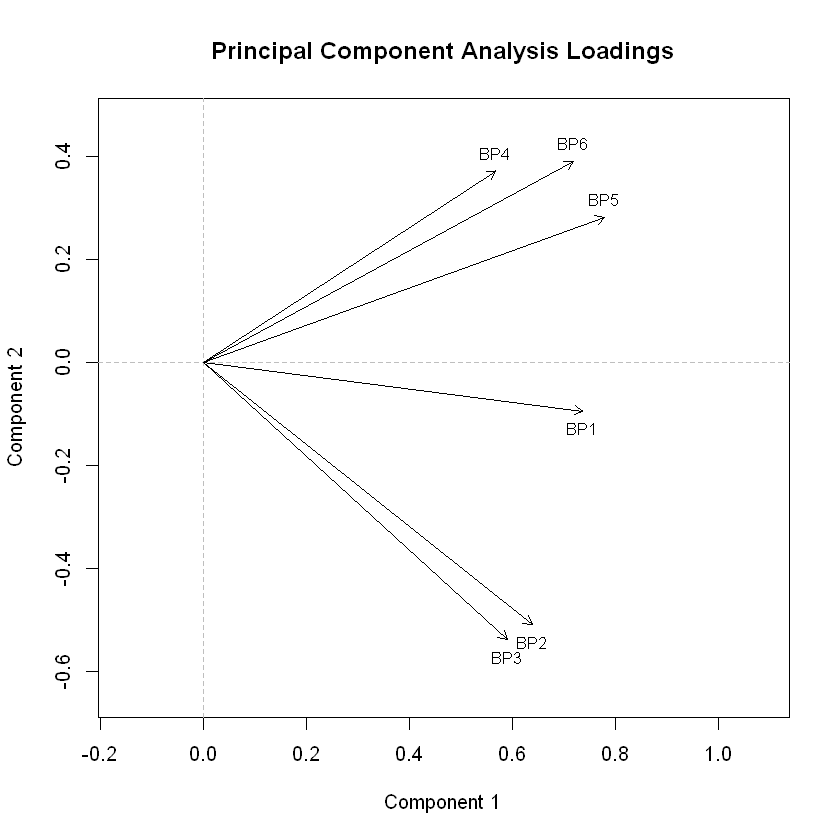

In [42]:
options(repr.plot.width=7, repr.plot.height=7)
prinBP <- princals(BP)
plot(prinBP, main = "Principal Component Analysis Loadings")

### 4.1.3 Classical Test Theory 

##### a. The classic Cronbach $\alpha$ (BP)

In [43]:
alpha_cronbach<- function(df){
    k <- ncol(df)
    covDF <- cov(df)
    tot_variance <- sum(covDF)
    variance_DFi <- tr(covDF)
    k/(k-1)*(1-variance_DFi/tot_variance)
}

In [44]:
alpha_cronbach(BP); psych::alpha(BP)$total[1]

[1] 0.7579801

raw_alpha
 0.7579801

##### b. $\omega$ Coefficients (BP)

[1] 0.8395666

[1] 0.6871149

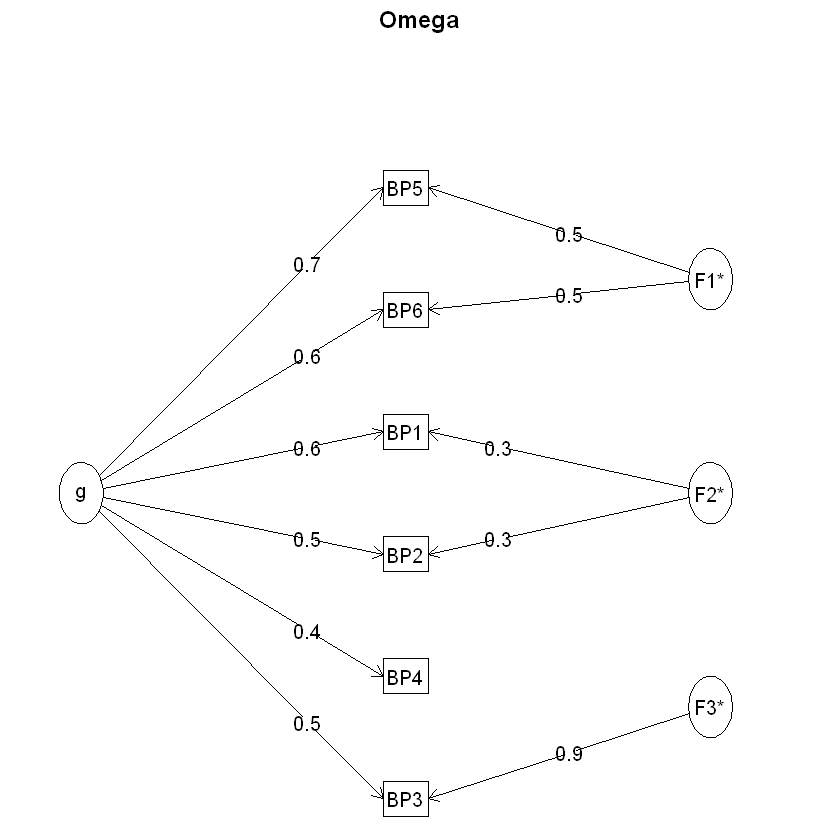

In [45]:
omega(BP)$omega.tot; omega(BP)$omega_h

##### C.  Generalizability coefficient (BP)

In [46]:
g_coeff <- function(dflong){
    gfit <- gstudy(data = dflong,
               formula = value ~ (1|person) + (1|item))
    dfit <- dstudy(gfit, colname.objects = "person",
               colname.scores = "value", data = dflong)
    round(dfit$generalizability, 3)
}

In [47]:
BPlong <- BP %>% mutate(person=CWS[,1]) %>% gather('item', 'value', -person)  
g_coeff(BPlong)

[1] 0.758

# 4.2 ES

 - ES1: I love to **talk with others** who admire my favorite celebrity
 - ES2: Keeping up with news about my favorite celebrity is an entertaining pass-time
 - ES3: It is enjoyable just to **be with others** who like my favorite celebrity
 - ES4: I enjoy watching, reading, or listening to my favorite celebrity because it means a good time
 - ES5: Learning the life story of my favorite celebrity is a lot of fun
 - ES6: I like watching and hearing about my favorite celebrity when I am **in a large group of people**
 - ES7: My friends and I like **to discuss** what my favorite celebrity has done

### 4.2.1 Pairplot of ES

<font color='blue'>
<h4 align="left">
Insight: ES1 and ES3 are strongly correlated, as are ES6 and ES7

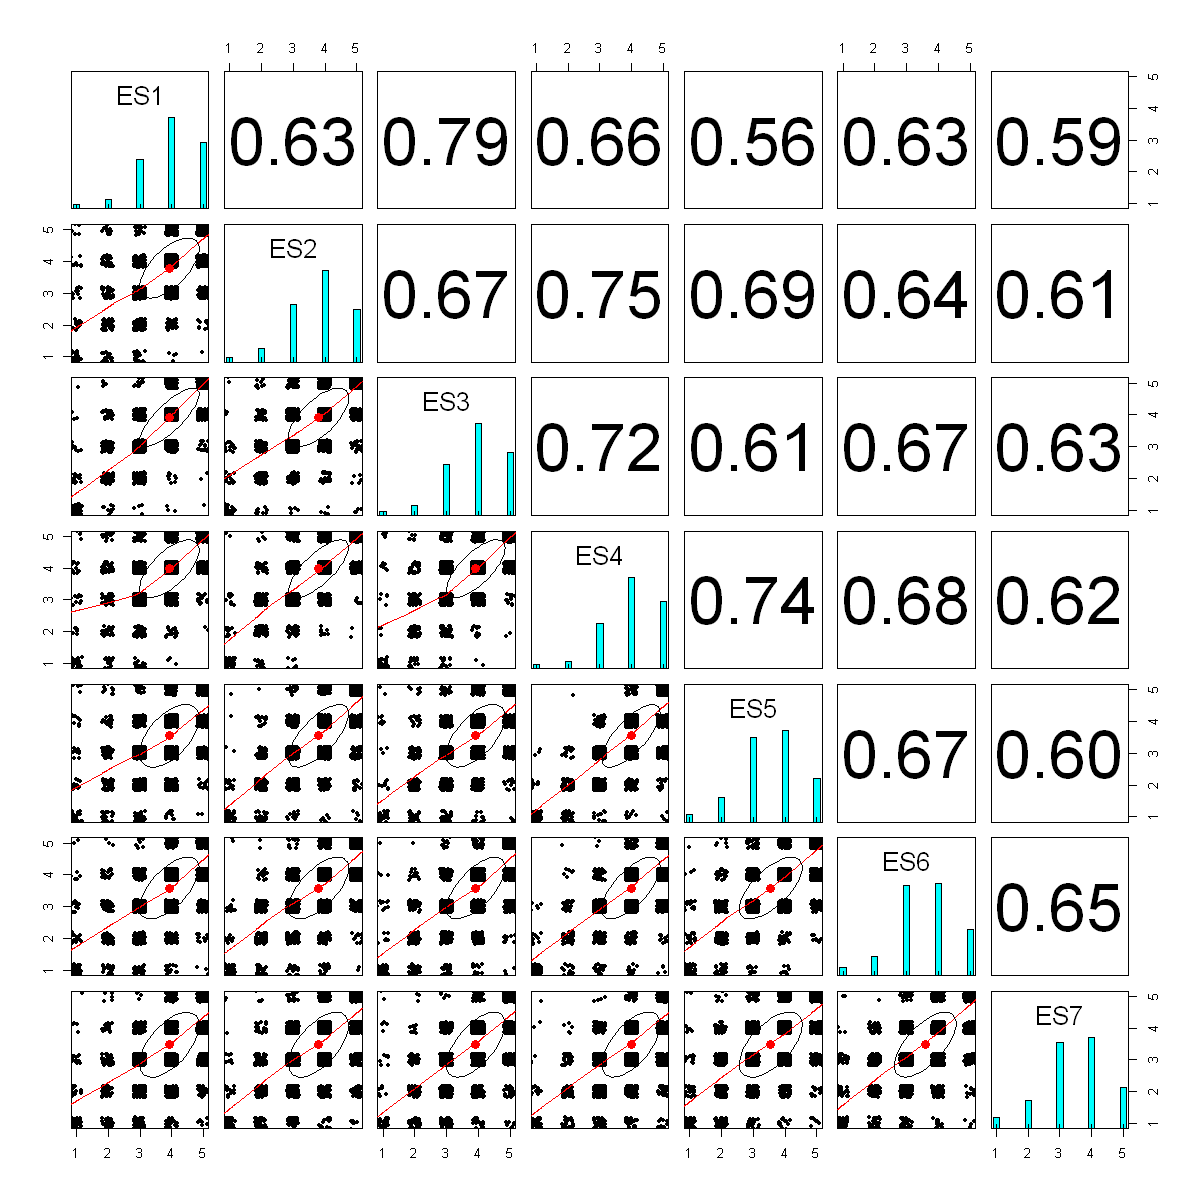

In [48]:
options(repr.plot.width=10, repr.plot.height=10)
ES <- CWS[, grep('ES',names(CWS))]
ES %>% pairs.panels(show.point=T, method='pearson',
                    density=F, jiggle=T, factor=0.9,
                    hist.col='cyan', cex.cor=3)

### 4.2.2 PCA Loadings of ES

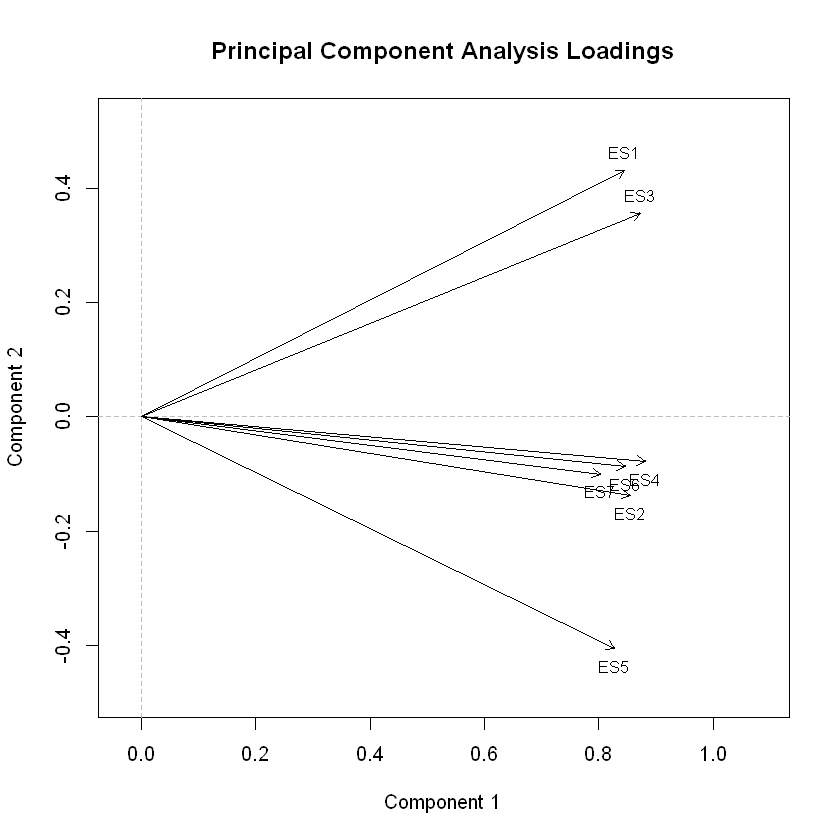

In [49]:
options(repr.plot.width=7, repr.plot.height=7)
prinES <- princals(ES)
plot(prinES, main = "Principal Component Analysis Loadings")

### 4.2.3 Classical Test Theory 

<font color='blue'>
<h4 align="left">
Insight: Possible redundant items have been detected in  ES 

##### a. The classic Cronbach $\alpha$ (ES)

In [50]:
psych::alpha(ES)$total[1]

raw_alpha
 0.9300383

##### b. $\omega$ Coefficients (ES)

Warning message in fa.stats(r = r, f = f, phi = phi, n.obs = n.obs, np.obs = np.obs, :
"The estimated weights for the factor scores are probably incorrect.  Try a different factor score estimation method."
Warning message in fac(r = r, nfactors = nfactors, n.obs = n.obs, rotate = rotate, :
"An ultra-Heywood case was detected.  Examine the results carefully"
Warning message in cov2cor(t(w) %*% r %*% w):
"diag(.) had 0 or NA entries; non-finite result is doubtful"


[1] 0.9458532

Warning message in fa.stats(r = r, f = f, phi = phi, n.obs = n.obs, np.obs = np.obs, :
"The estimated weights for the factor scores are probably incorrect.  Try a different factor score estimation method."
Warning message in fac(r = r, nfactors = nfactors, n.obs = n.obs, rotate = rotate, :
"An ultra-Heywood case was detected.  Examine the results carefully"
Warning message in cov2cor(t(w) %*% r %*% w):
"diag(.) had 0 or NA entries; non-finite result is doubtful"


[1] 0.8631268

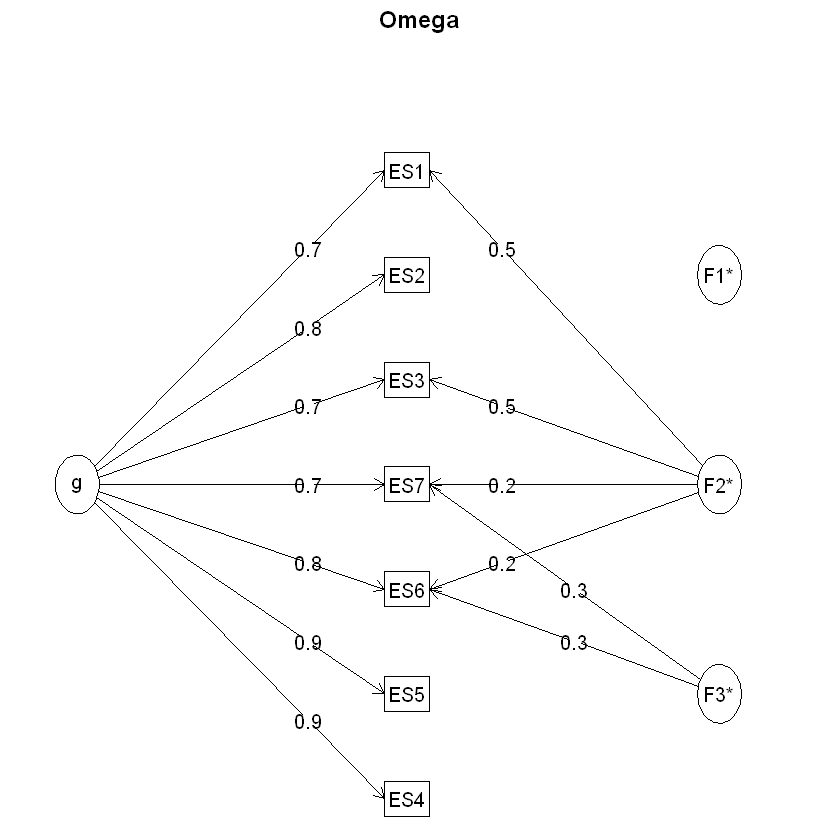

In [51]:
omega(ES)$omega.tot; omega(ES)$omega_h

##### C.  Generalizability coefficient (ES)

In [52]:
ESlong <- ES %>% mutate(person=CWS[,1])   %>% gather('item', 'value', -person)  
gfit <- gstudy(data = ESlong,
               formula = value ~ (1|person) + (1|item))
dfit <- dstudy(gfit, colname.objects = "person",
               colname.scores = "value", data = ESlong)
round(dfit$generalizability, 3)

[1] 0.93

## 4.3 IP

 - IP1: If I were to meet my favorite celebrity in person, he/she would already somehow know that I am his/her biggest fan
 - IP2: One of the main reasons I maintain an interest in my favorite celebrity is that doing so gives me a temporary escape from life’s problems
 - IP3: My favorite celebrity is practically perfect in every way
 - IP4: I share with my favorite celebrity a special bond that cannot be described in words
 - IP5: To know my favorite celebrity is to love him/her
 - IP6: When something bad happens to my favorite celebrity **I feel like it happened to me**
 - IP7: When my favorite celebrity fails or loses at something **I feel like a failure myself**
 - IP8: The successes of my favorite celebrity are my successes also
 - IP9: I consider my favorite celebrity to be my soulmate
 - IP10: When my favorite celebrity dies (or died) I will feel (or I felt) like dying too
 - IP11: If someone gave me several thousand dollars to do with as I please, I would consider spending it on a personal possession (like a napkin or paper plate) once used by my favorite celebrity
 - IP12: When something good happens to my favorite celebrity I feel like it happened to me
 - IP13: I am obsessed by details of my favorite celebrity’s life

### 4.3.1 Pairplot of IP

<font color='blue'>
<h4 align="left">
Insight: IP6 and 1P7 are strongly correlated 

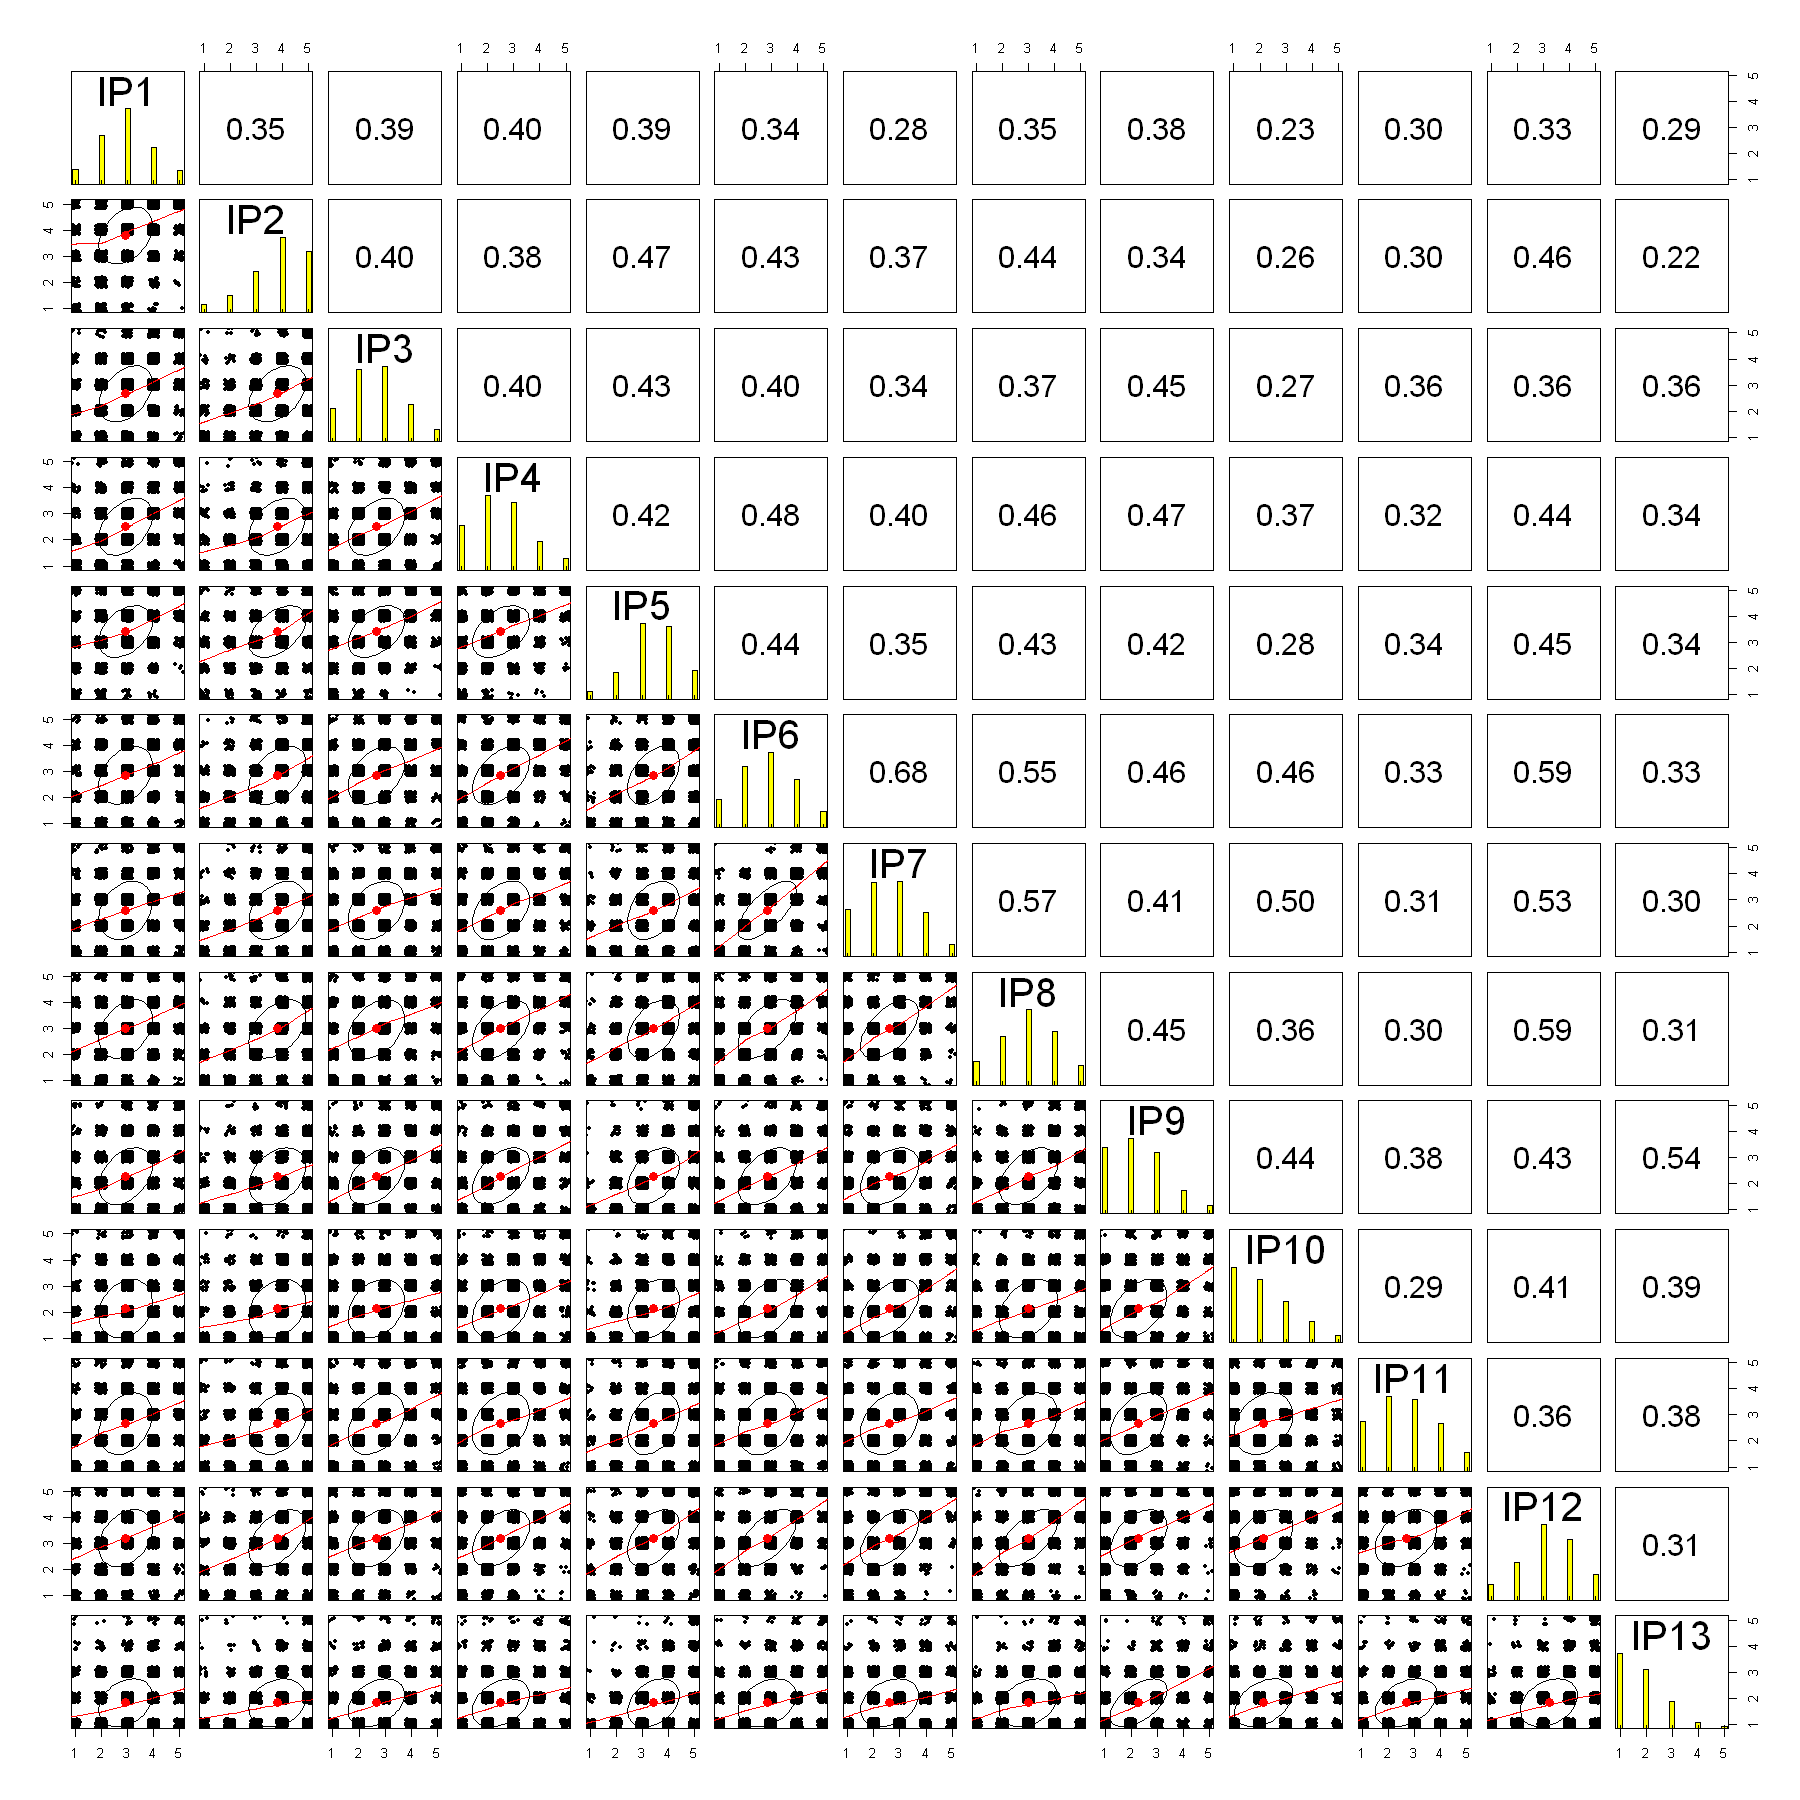

In [53]:
options(repr.plot.width=15, repr.plot.height=15)
IP <- CWS[, grep('IP',names(CWS))]
IP %>% pairs.panels(show.point=T, method='pearson',
                    density=F, jiggle=T, factor=0.9,
                    hist.col='yellow', cex.labels=3, cex.cor=3)

### 4.3.2 PCA Loadings of IP

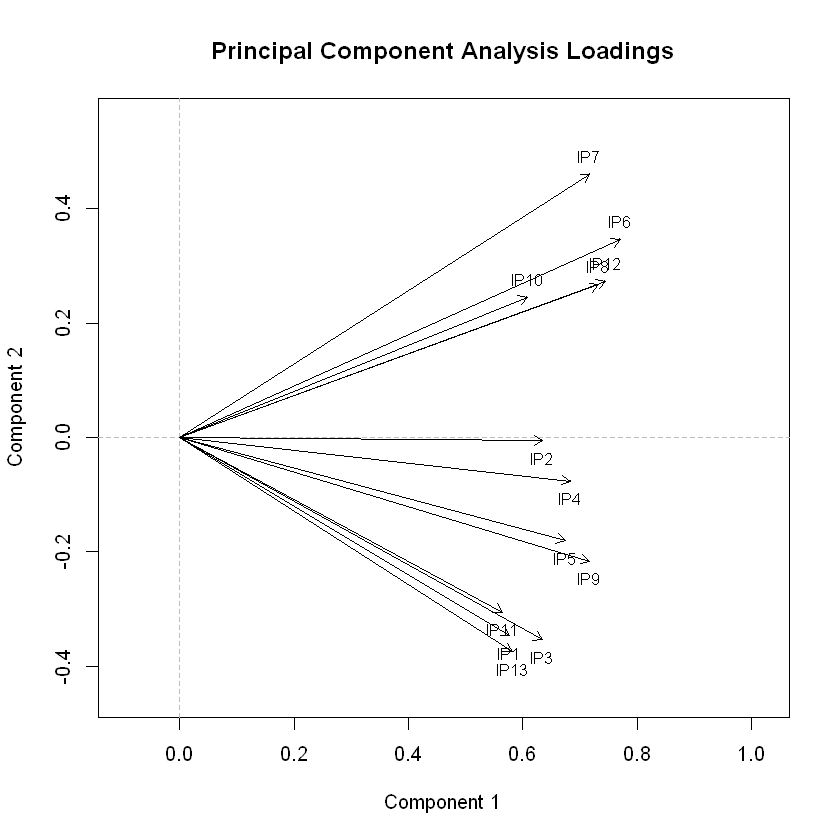

In [54]:
options(repr.plot.width=7, repr.plot.height=7)
prinIP <- princals(IP)
plot(prinIP, main = "Principal Component Analysis Loadings")

##### a. The classic Cronbach $\alpha$ (IP)

In [55]:
psych::alpha(IP)$total[1]

raw_alpha
 0.8932491

##### b. $\omega$ Coefficients (IP)

[1] 0.9109403

[1] 0.709524

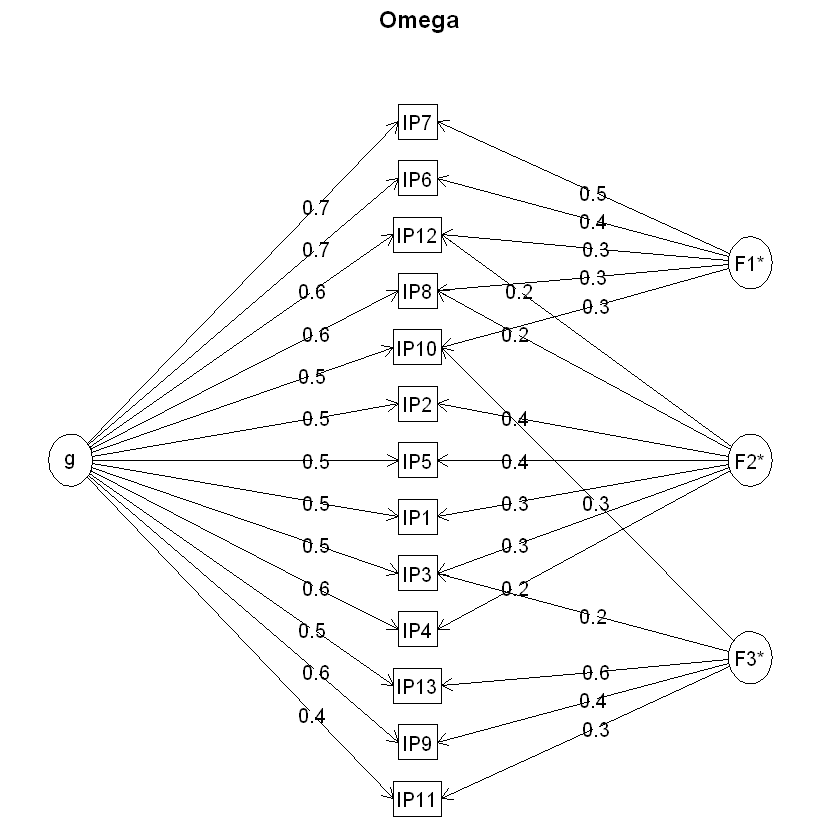

In [56]:
omega(IP)$omega.tot; omega(IP)$omega_h

##### C.  Generalizability coefficient (IP)

In [57]:
IPlong <- IP %>% mutate(person=CWS[,1])   %>% gather('item', 'value', -person)  
gfit <- gstudy(data = IPlong,
               formula = value ~ (1|person) + (1|item))
dfit <- dstudy(gfit, colname.objects = "person",
               colname.scores = "value", data = IPlong)
round(dfit$generalizability, 3)

[1] 0.893

<div class="alert-info">
<font color='blue'>
<h3 align="center">
~ 

# 5. Confirmatory Factor Analysis (CFA)

Factor analysis aims to determine the amount of shared variance among items. This is achieved by describing the variance-covariance matrix using the model-implied covariance matrix, which differs from the observed population covariance matrix derived only from the data. The formula for the model-implied covariance matrix is

$$ 
\Sigma(\theta) = \mathbf{\Lambda \Psi \Lambda’} + \Theta_{\epsilon}
$$

$$
\Sigma(\theta) =
\begin{pmatrix}
\lambda_{1} \\
\lambda_{2} \\
\lambda_{...}
\end{pmatrix}
\begin{pmatrix}
\psi_{11}
\end{pmatrix}
\begin{pmatrix}
\lambda_{1} & \lambda_{2} & \lambda_{...}
\end{pmatrix}
+
\begin{pmatrix}
\theta_{11} &  \theta_{12} & \theta_{...} \\
\theta_{21} & \theta_{22} & \theta_{...} \\
\theta_{...} & \theta_{...} & \theta_{...} \\
\end{pmatrix}
$$

## 5.1 Model Specification

In [58]:
vind <- grep("BP|ES|IP", colnames(CWS)) 
CWS_item <- CWS[, vind]
CWS_model <- '
ES =~ ES1 + ES2 + ES3 + ES4 + 
ES5 + ES6 + ES7 

BP =~ BP1 + BP2 + BP3 + BP4 + 
BP5 + BP6

IP =~ IP1 + IP2 + IP3 + IP4 + 
IP5 + IP6 + IP7 + IP8 + IP9 + 
IP10 + IP11 + IP12 + IP13
'
fitMod <- lavaan::cfa(CWS_model, data = CWS_item,
                      ordered = names(CWS_item))

In [59]:
head(parTable(fitMod), 7)
tail(parTable(fitMod), 7)

id lhs op rhs user block group free ustart exo label plabel start    
1 1  ES  =~ ES1 1    1     1     0     1     0         .p1.   1.0000000
2 2  ES  =~ ES2 1    1     1     1    NA     0         .p2.   0.8911516
3 3  ES  =~ ES3 1    1     1     2    NA     0         .p3.   1.0525097
4 4  ES  =~ ES4 1    1     1     3    NA     0         .p4.   0.9503015
5 5  ES  =~ ES5 1    1     1     4    NA     0         .p5.   0.8453765
6 6  ES  =~ ES6 1    1     1     5    NA     0         .p6.   0.8921698
7 7  ES  =~ ES7 1    1     1     6    NA     0         .p7.   0.8432294
  est       se         
1 1.0000000 0.000000000
2 1.0240970 0.007385541
3 1.0386317 0.007467323
4 1.0684583 0.007523651
5 1.0046631 0.008128140
6 0.9774146 0.007775040
7 0.9264403 0.008749094

id  lhs  op rhs user block group free ustart exo label plabel start est se
211 211 IP10 ~1     0    1     1     0    0      0         .p211. 0     0   0 
212 212 IP11 ~1     0    1     1     0    0      0         .p212. 0     0   0 
213 213 IP12 ~1     0    1     1     0    0      0         .p213. 0     0   0 
214 214 IP13 ~1     0    1     1     0    0      0         .p214. 0     0   0 
215 215 ES   ~1     0    1     1     0    0      0         .p215. 0     0   0 
216 216 BP   ~1     0    1     1     0    0      0         .p216. 0     0   0 
217 217 IP   ~1     0    1     1     0    0      0         .p217. 0     0   0

## 5.2  CFA path diagram

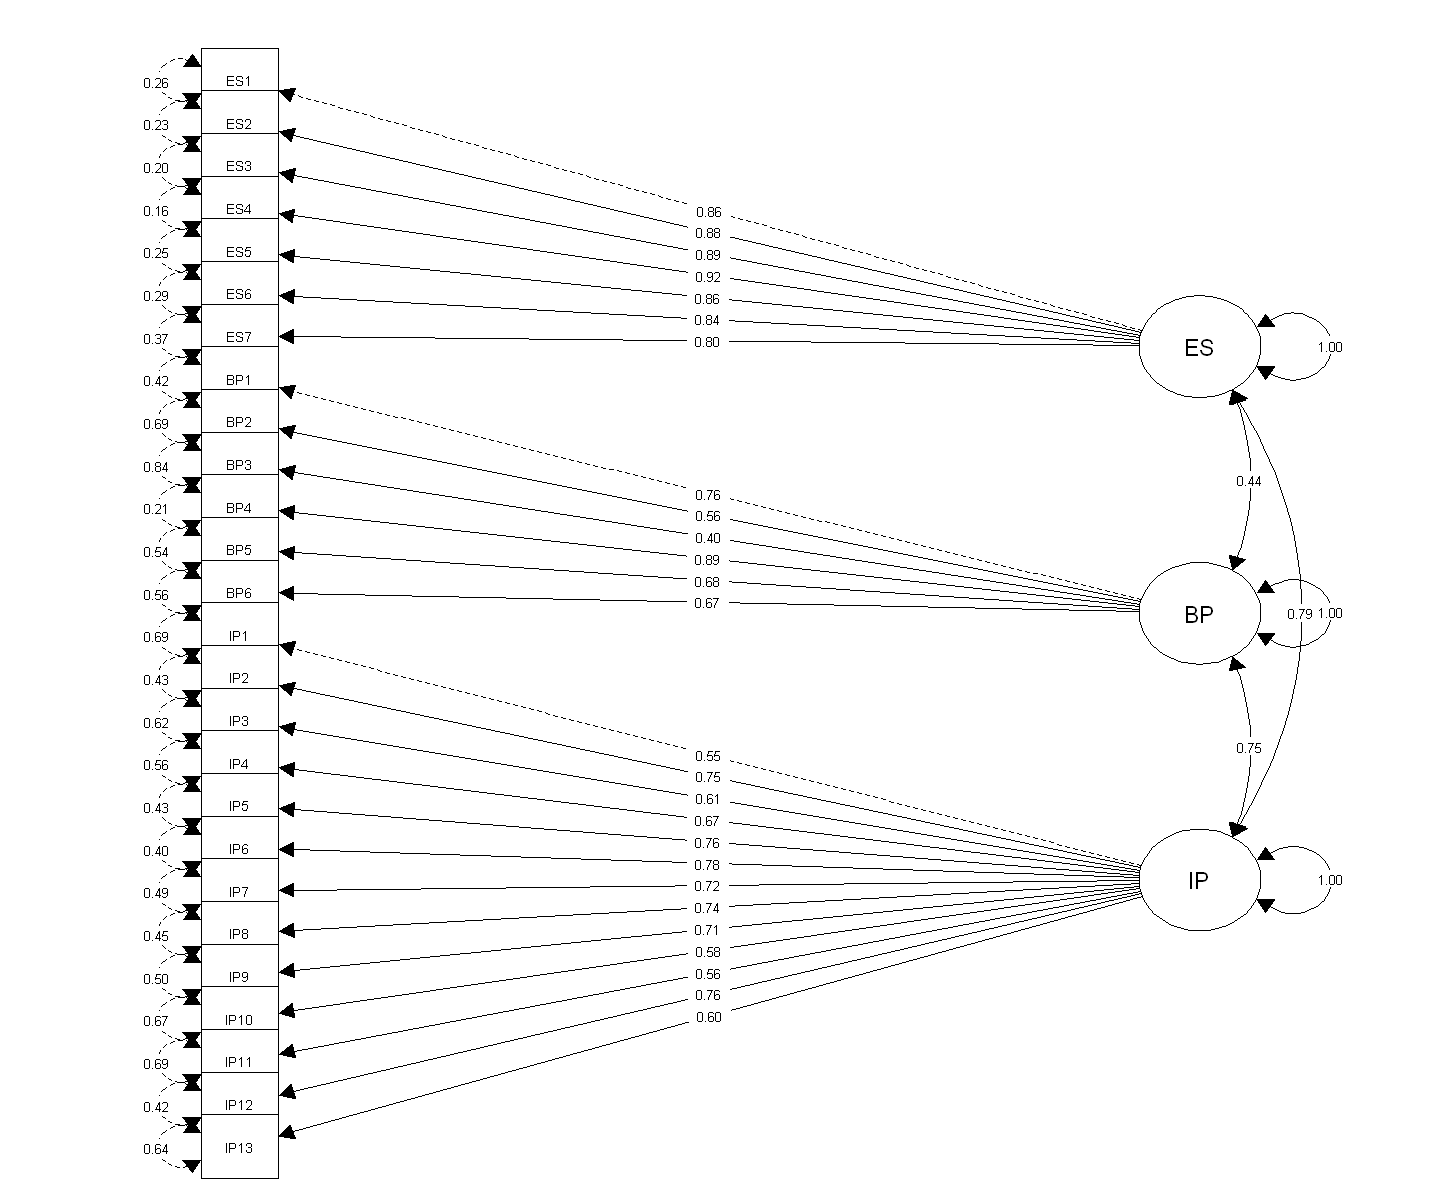

In [60]:
options(repr.plot.width=12, repr.plot.height=10)
semPaths(fitMod, what = "std", edge.label.cex = 0.7, edge.color = 1, esize = 1, 
         sizeMan = 5, asize = 2.5,
         intercepts = FALSE, rotation = 4, thresholds= FALSE, 
         mar = c(1, 5, 1.5, 5), fade = FALSE)

## 5.3 Model Inspection 

### 5.3.1 Theta (residual variance)

<font color='blue'>
<h4 align="left">
Insight: BP3 has the highest residual variance among all items, indicating a deviation from the underlying BP factor 

In [61]:
data.frame(diag_theta_est =diag(inspect(fitMod, what = "est")$theta))

diag_theta_est
ES1  0.2616807     
ES2  0.2256694     
ES3  0.2035338     
ES4  0.1571323     
ES5  0.2547790     
ES6  0.2946545     
ES7  0.3663067     
BP1  0.4172153     
BP2  0.6856607     
BP3  0.8416939     
BP4  0.2119649     
BP5  0.5361074     
BP6  0.5552905     
IP1  0.6922751     
IP2  0.4317404     
IP3  0.6246709     
IP4  0.5569310     
IP5  0.4272427     
IP6  0.3981595     
IP7  0.4886722     
IP8  0.4525385     
IP9  0.5019249     
IP10 0.6671324     
IP11 0.6896661     
IP12 0.4214917     
IP13 0.6422714

###  5.3.2 Lambda (factor loading)

In [62]:
lambda_est <- data.frame(inspect(fitMod, what = "est")$lambda)
colnames(lambda_est) <- paste0(names(lambda_est), '_est')
lambda_std <- data.frame(inspect(fitMod, what = "std")$lambda)
colnames(lambda_std) <- paste0(names(lambda_std), '_std')
cbind(lambda_est, lambda_std)

ES_est    BP_est    IP_est   ES_std    BP_std    IP_std   
ES1  1.0000000 0.0000000 0.000000 0.8592551 0.0000000 0.0000000
ES2  1.0240970 0.0000000 0.000000 0.8799606 0.0000000 0.0000000
ES3  1.0386317 0.0000000 0.000000 0.8924496 0.0000000 0.0000000
ES4  1.0684583 0.0000000 0.000000 0.9180783 0.0000000 0.0000000
ES5  1.0046631 0.0000000 0.000000 0.8632619 0.0000000 0.0000000
ES6  0.9774146 0.0000000 0.000000 0.8398485 0.0000000 0.0000000
ES7  0.9264403 0.0000000 0.000000 0.7960485 0.0000000 0.0000000
BP1  0.0000000 1.0000000 0.000000 0.0000000 0.7634034 0.0000000
BP2  0.0000000 0.7344213 0.000000 0.0000000 0.5606597 0.0000000
BP3  0.0000000 0.5211884 0.000000 0.0000000 0.3978770 0.0000000
BP4  0.0000000 1.1628367 0.000000 0.0000000 0.8877134 0.0000000
BP5  0.0000000 0.8921845 0.000000 0.0000000 0.6810966 0.0000000
BP6  0.0000000 0.8735427 0.000000 0.0000000 0.6668655 0.0000000
IP1  0.0000000 0.0000000 1.000000 0.0000000 0.0000000 0.5547296
IP2  0.0000000 0.0000000 1.358914 0.0000000 0.0000000 0.7538299
IP3  0.0000000 0.0000000 1.104396 0.0000000 0.0000000 0.6126411
IP4  0.0000000 0.0000000 1.199926 0.0000000 0.0000000 0.6656343
IP5  0.0000000 0.0000000 1.364282 0.0000000 0.0000000 0.7568073
IP6  0.0000000 0.0000000 1.398490 0.0000000 0.0000000 0.7757838
IP7  0.0000000 0.0000000 1.289046 0.0000000 0.0000000 0.7150719
IP8  0.0000000 0.0000000 1.333815 0.0000000 0.0000000 0.7399064
IP9  0.0000000 0.0000000 1.272231 0.0000000 0.0000000 0.7057443
IP10 0.0000000 0.0000000 1.040051 0.0000000 0.0000000 0.5769468
IP11 0.0000000 0.0000000 1.004230 0.0000000 0.0000000 0.5570763
IP12 0.0000000 0.0000000 1.371114 0.0000000 0.0000000 0.7605974
IP13 0.0000000 0.0000000 1.078191 0.0000000 0.0000000 0.5981042

### 5.3.3 Psi (variance-covariance matrix of the latent factors )

<font color='blue'>
<h4 align="left">
Insight: ES and IP are strongly correlated, as are BP and IP 

In [63]:
psi_est <- data.frame(inspect(fitMod, what = "est")$psi)
colnames(psi_est) <- paste0(names(psi_est), '_est')
psi_std <- data.frame(inspect(fitMod, what = "std")$psi)
colnames(psi_std) <- paste0(names(psi_std), '_std')
cbind(psi_est, psi_std)

ES_est    BP_est    IP_est    ES_std    BP_std    IP_std   
ES 0.7383193 0.2857854 0.3782484 1.0000000 0.4356762 0.7935489
BP 0.2857854 0.5827847 0.3174933 0.4356762 1.0000000 0.7497203
IP 0.3782484 0.3174933 0.3077249 0.7935489 0.7497203 1.0000000

## 5.4 Model Adequacy 

In [64]:
summary(fitMod, fit.measures=TRUE)$optim

$estimator
[1] "DWLS"

$estimator.args
list()

$optim.method
[1] "nlminb"

$npar
[1] 133

$eq.constraints
[1] FALSE

$nrow.ceq.jac
[1] 0

$nrow.cin.jac
[1] 0

$nrow.con.jac
[1] 0

$con.jac.rank
[1] 0

### 5.4.1 Factor Loading 

In [65]:
parameterEstimates(fitMod, standardized = TRUE)  %>% filter(op=='=~')

lhs op rhs  est       se          z         pvalue ci.lower  ci.upper 
1  ES  =~ ES1  1.0000000 0.000000000        NA NA     1.0000000 1.0000000
2  ES  =~ ES2  1.0240970 0.007385541 138.66241  0     1.0096216 1.0385724
3  ES  =~ ES3  1.0386317 0.007467323 139.09023  0     1.0239960 1.0532674
4  ES  =~ ES4  1.0684583 0.007523651 142.01328  0     1.0537123 1.0832044
5  ES  =~ ES5  1.0046631 0.008128140 123.60308  0     0.9887322 1.0205939
6  ES  =~ ES6  0.9774146 0.007775040 125.71185  0     0.9621758 0.9926534
7  ES  =~ ES7  0.9264403 0.008749094 105.88985  0     0.9092924 0.9435882
8  BP  =~ BP1  1.0000000 0.000000000        NA NA     1.0000000 1.0000000
9  BP  =~ BP2  0.7344213 0.022972306  31.96986  0     0.6893965 0.7794462
10 BP  =~ BP3  0.5211884 0.027183986  19.17263  0     0.4679088 0.5744680
11 BP  =~ BP4  1.1628367 0.027916500  41.65410  0     1.1081213 1.2175520
12 BP  =~ BP5  0.8921845 0.022654285  39.38259  0     0.8477829 0.9365860
13 BP  =~ BP6  0.8735427 0.023610736  36.99769  0     0.8272666 0.9198189
14 IP  =~ IP1  1.0000000 0.000000000        NA NA     1.0000000 1.0000000
15 IP  =~ IP2  1.3589143 0.031880675  42.62502  0     1.2964294 1.4213993
16 IP  =~ IP3  1.1043960 0.027632733  39.96695  0     1.0502368 1.1585551
17 IP  =~ IP4  1.1999258 0.027284976  43.97753  0     1.1464482 1.2534034
18 IP  =~ IP5  1.3642816 0.030602626  44.58054  0     1.3043016 1.4242617
19 IP  =~ IP6  1.3984901 0.031188872  44.83939  0     1.3373611 1.4596192
20 IP  =~ IP7  1.2890460 0.029861792  43.16707  0     1.2305179 1.3475740
21 IP  =~ IP8  1.3338147 0.029834935  44.70647  0     1.2753393 1.3922901
22 IP  =~ IP9  1.2722313 0.029217671  43.54322  0     1.2149658 1.3294969
23 IP  =~ IP10 1.0400505 0.028888772  36.00189  0     0.9834296 1.0966715
24 IP  =~ IP11 1.0042303 0.027766482  36.16700  0     0.9498090 1.0586516
25 IP  =~ IP12 1.3711138 0.030536197  44.90126  0     1.3112640 1.4309636
26 IP  =~ IP13 1.0781906 0.030103787  35.81578  0     1.0191882 1.1371929
   std.lv    std.all   std.nox  
1  0.8592551 0.8592551 0.8592551
2  0.8799606 0.8799606 0.8799606
3  0.8924496 0.8924496 0.8924496
4  0.9180783 0.9180783 0.9180783
5  0.8632619 0.8632619 0.8632619
6  0.8398485 0.8398485 0.8398485
7  0.7960485 0.7960485 0.7960485
8  0.7634034 0.7634034 0.7634034
9  0.5606597 0.5606597 0.5606597
10 0.3978770 0.3978770 0.3978770
11 0.8877134 0.8877134 0.8877134
12 0.6810966 0.6810966 0.6810966
13 0.6668655 0.6668655 0.6668655
14 0.5547296 0.5547296 0.5547296
15 0.7538299 0.7538299 0.7538299
16 0.6126411 0.6126411 0.6126411
17 0.6656343 0.6656343 0.6656343
18 0.7568073 0.7568073 0.7568073
19 0.7757838 0.7757838 0.7757838
20 0.7150719 0.7150719 0.7150719
21 0.7399064 0.7399064 0.7399064
22 0.7057443 0.7057443 0.7057443
23 0.5769468 0.5769468 0.5769468
24 0.5570763 0.5570763 0.5570763
25 0.7605974 0.7605974 0.7605974
26 0.5981042 0.5981042 0.5981042

### 5.4.2 Model Fit

In [66]:
fitMeasures(fitMod, c("cfi", "tli", "rmsea"))

cfi   tli rmsea 
0.976 0.974 0.107

- CFI and TLI values ≥ 0.90 are considered indicative of good fit (Martinková & Hladka, 2023)
- RMSEA values ≤ 0.05 are indicative of close fit, values < 0.10 indicate acceptable fit (Martinková & Hladka, 2023)





## 5.5 Model Improvement

<font color='blue'>
<h4 align="left">
Insight: Some items may have cross-loading, indicating that they may load onto multiple factors. 

### 5.5.1 Modification Indices

In [67]:
head(modindices(fitMod, minimum.value=3, sort=TRUE), 10)

lhs op rhs  mi        epc        sepc.lv    sepc.all   sepc.nox  
267 IP  =~ BP4  2047.0369  1.9234093  1.0669720  1.0669720  1.0669720
221 ES  =~ BP4  2032.2188  0.7088733  0.6091030  0.6091030  0.6091030
225 ES  =~ IP2  1418.9777  0.7685912  0.6604159  0.6604159  0.6604159
245 BP  =~ IP2  1107.1274 -0.9068347 -0.6922807 -0.6922807 -0.6922807
228 ES  =~ IP5  1045.7106  0.6520849  0.5603073  0.5603073  0.5603073
271 ES1 ~~ ES3   954.2252  0.2146582  0.2146582  0.9301295  0.9301295
567 IP6 ~~ IP7   817.5244  0.2647379  0.2647379  0.6001762  0.6001762
248 BP  =~ IP5   697.6746 -0.6931267 -0.5291353 -0.5291353 -0.5291353
490 BP5 ~~ BP6   676.9204  0.3622732  0.3622732  0.6639727  0.6639727
256 BP  =~ IP13  653.1231  0.7159903  0.5465894  0.5465894  0.5465894

### 5.5.2 Model Refitting

In [68]:
CWS_model2<- '
ES =~ ES1 + ES2 + ES3 + ES4 + 
ES5 + ES6 + ES7 

BP =~ BP1 + BP2 + BP3 + BP4 + 
BP5 + BP6

IP =~ IP1 + IP2 + IP3 + IP4 + 
IP5 + IP6 + IP7 + IP8 + IP9 + 
IP10 + IP11 + IP12 + IP13

#item correlations 
ES1~~ES3
IP6~~IP7
BP5~~BP6
'
fitMod2 <- lavaan::cfa(CWS_model2, data = CWS_item,
                      ordered = names(CWS_item))

In [69]:
fitMeasures(fitMod2, c("cfi", "tli", "rmsea"))

cfi   tli rmsea 
0.981 0.979 0.095

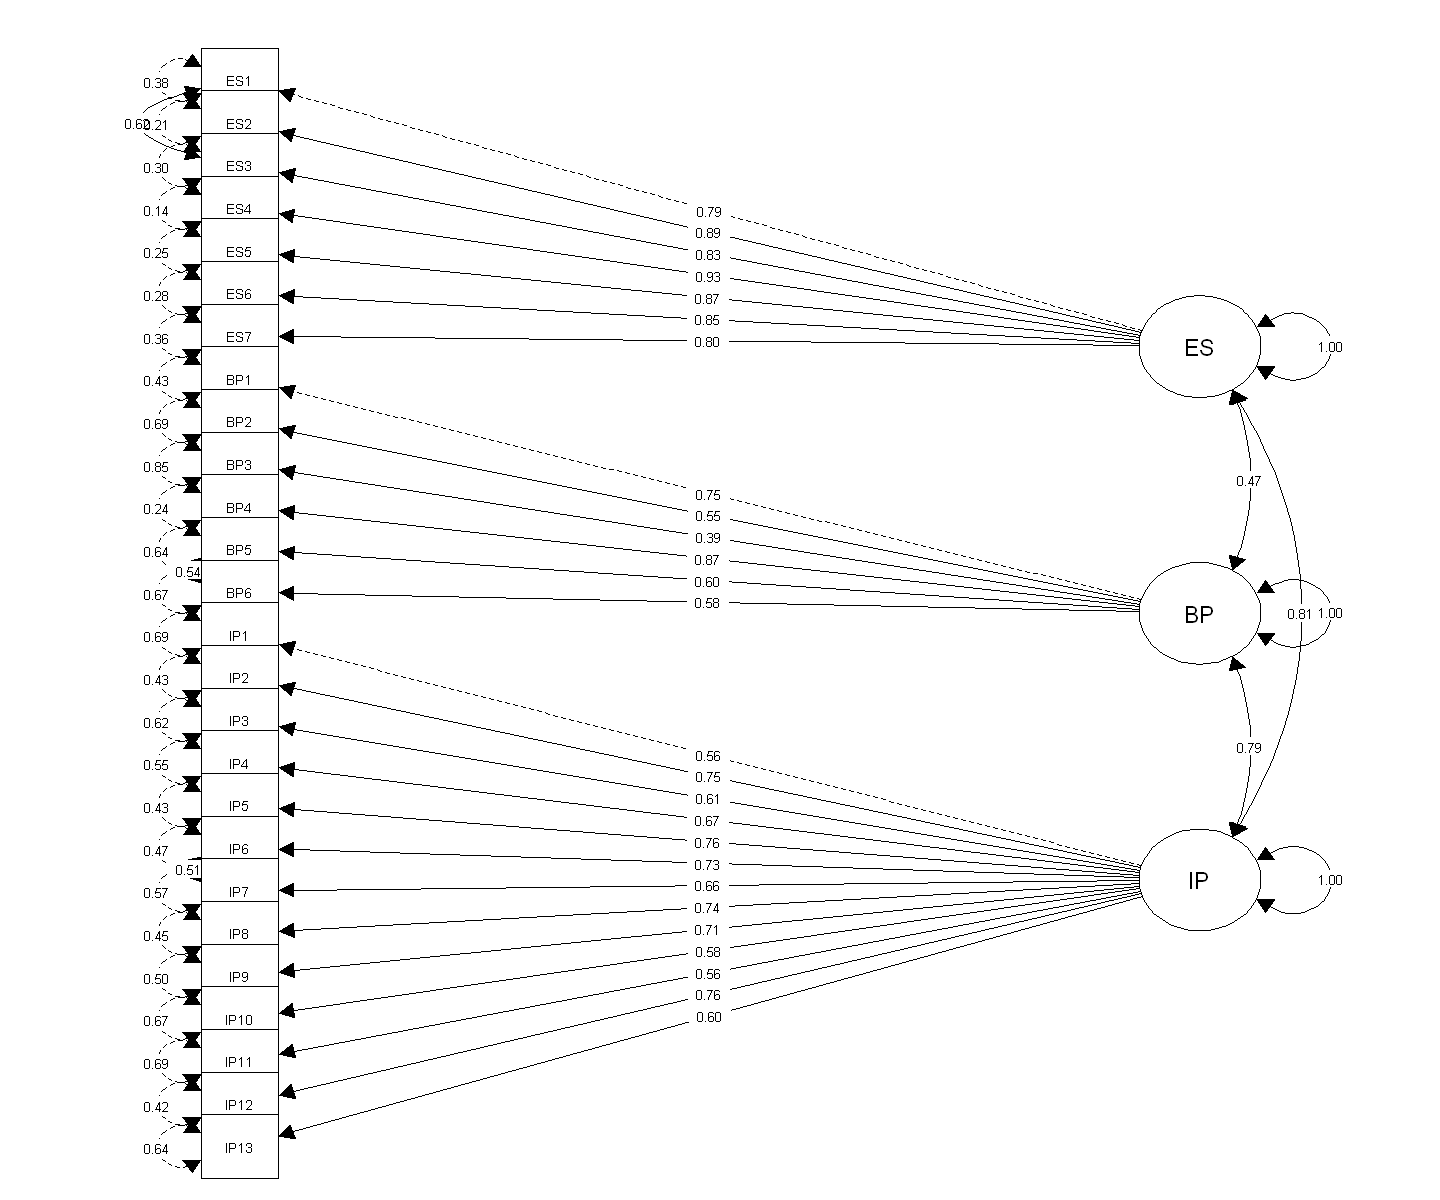

In [70]:
semPaths(fitMod2, what = "std", edge.label.cex = 0.7, edge.color = 1, esize = 1, 
         sizeMan = 5, asize = 2.5,
         intercepts = FALSE, rotation = 4, thresholds= FALSE, 
         mar = c(1, 5, 1.5, 5), fade = FALSE)

## 5.6 The Group-Specific Model (Female only)

### 5.6.1 Model Specification

In [71]:
vind <- grep("BP|ES|IP", colnames(CWS)) 
CWS_female <- na.omit(CWS) %>% filter(Sex=='Female')  %>% .[, vind]

In [72]:
CWS_model_female<- '
ES =~ ES1 + ES2 + ES3 + ES4 + 
ES5 + ES6 + ES7 

BP =~ BP1 + BP2 + BP3 + BP4 + 
BP5 + BP6

IP =~ IP1 + IP2 + IP3 + IP4 + 
IP5 + IP6 + IP7 + IP8 + IP9 + 
IP10 + IP11 + IP12 + IP13

#item correlations 
ES1~~ES3
IP6~~IP7
BP5~~BP6
'
fitMod_female <- lavaan::cfa(CWS_model_female, data = CWS_female,
                      ordered = names(CWS_female))

In [73]:
fitMeasures(fitMod_female, c("cfi", "tli", "rmsea"))

cfi   tli rmsea 
0.980 0.977 0.095

### 5.6.2 Model Prediction

In [74]:
CWS_female_pred<-predict(fitMod_female)

In [75]:
head(CWS_female_pred)

ES          BP         IP         
[1,] -0.66411724  0.1657835 -0.15307221
[2,] -2.48657855  0.1508535 -1.13663430
[3,]  0.01088679  0.1100866  0.07782051
[4,]  1.44013022  0.3292609  0.75937986
[5,]  1.37161813  1.1541262  0.92135183
[6,]  0.70433128 -0.3597916 -0.11788553

In [76]:
dim(CWS_female_pred)

[1] 3040    3

### 5.6.3 Does Age Matter?

<font color='blue'>
<h4 align="left">
Insight: There is a noticeable pattern between the above-median and below-median groups 

In [77]:
CWS_female_pred_full<- na.omit(cbind( CWS_female_pred,
                         na.omit(CWS) %>% filter(Sex=='Female')  %>% select(Age,Domicile,Domicile_Category)))
CWS_female_pred_full$Age_Category_Female<-factor(ifelse(CWS_female_pred_full$Age>median(CWS_female_pred_full$Age), 
                                                        'AboveMedian', 'BelowMedian' ))
summary(CWS_female_pred_full)

       ES                  BP                  IP                  Age       
 Min.   :-2.598202   Min.   :-2.108111   Min.   :-1.8802868   Min.   :11.00  
 1st Qu.:-0.538079   1st Qu.:-0.438501   1st Qu.:-0.3269356   1st Qu.:18.00  
 Median :-0.003286   Median : 0.018033   Median :-0.0090303   Median :19.00  
 Mean   :-0.003400   Mean   : 0.006315   Mean   : 0.0003193   Mean   :19.65  
 3rd Qu.: 0.493529   3rd Qu.: 0.442609   3rd Qu.: 0.3341041   3rd Qu.:21.00  
 Max.   : 2.253571   Max.   : 3.068431   Max.   : 2.1975027   Max.   :40.00  
                                                                             
         Domicile             Domicile_Category  Age_Category_Female
 West Java   :706   Java Island        :2361    AboveMedian:1437    
 Jakarta     :591   Outside Java Island: 679    BelowMedian:1603    
 East Java   :394                                                   
 Central Java:306                                                   
 Banten      :243              

In [78]:
colors <- c("red", "darkcyan")
CWS_female_pred_full$color <- colors[ as.numeric(CWS_female_pred_full$Age_Category_Female)]

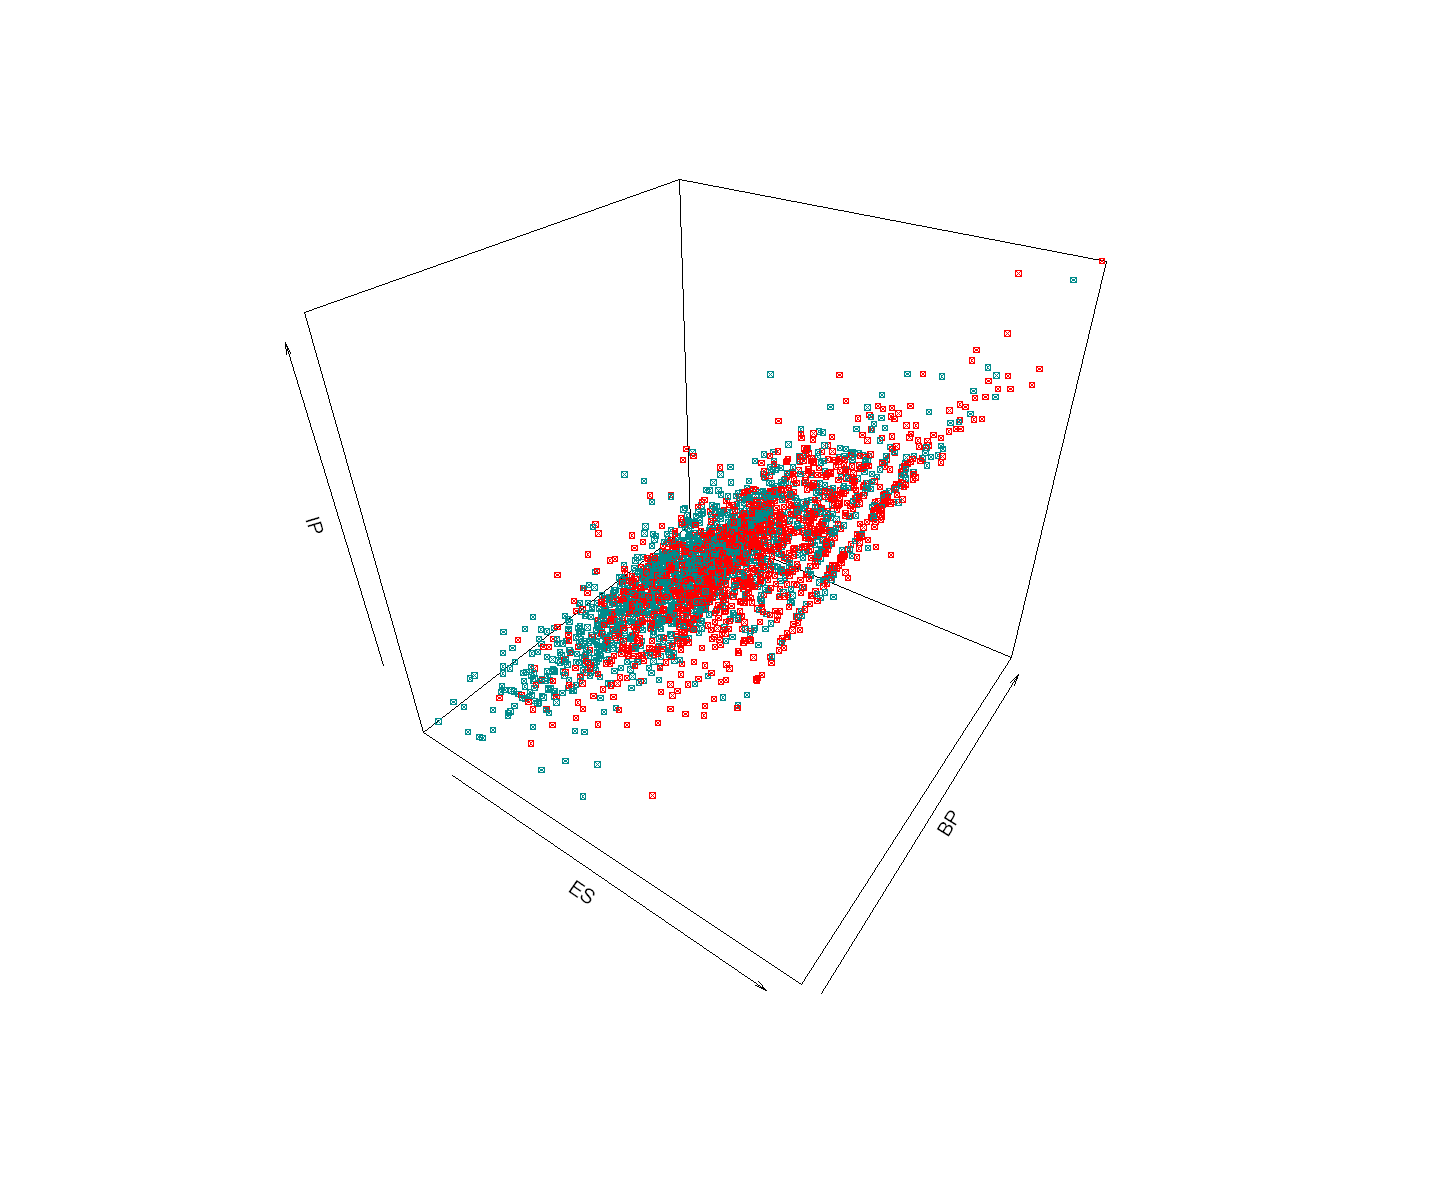

In [79]:
scatter3D(CWS_female_pred_full[,1],CWS_female_pred_full[,2],CWS_female_pred_full[,3], 
                colvar = NULL, col = CWS_female_pred_full$color,
                pch = 7, cex = 0.6, theta = 35, phi = 35, xlab = "ES",ylab = "BP", zlab = "IP")

<font color='blue'>
<h4 align="left">
Insight: The below-median age group has a relatively lower ES score than the above-median age group. 

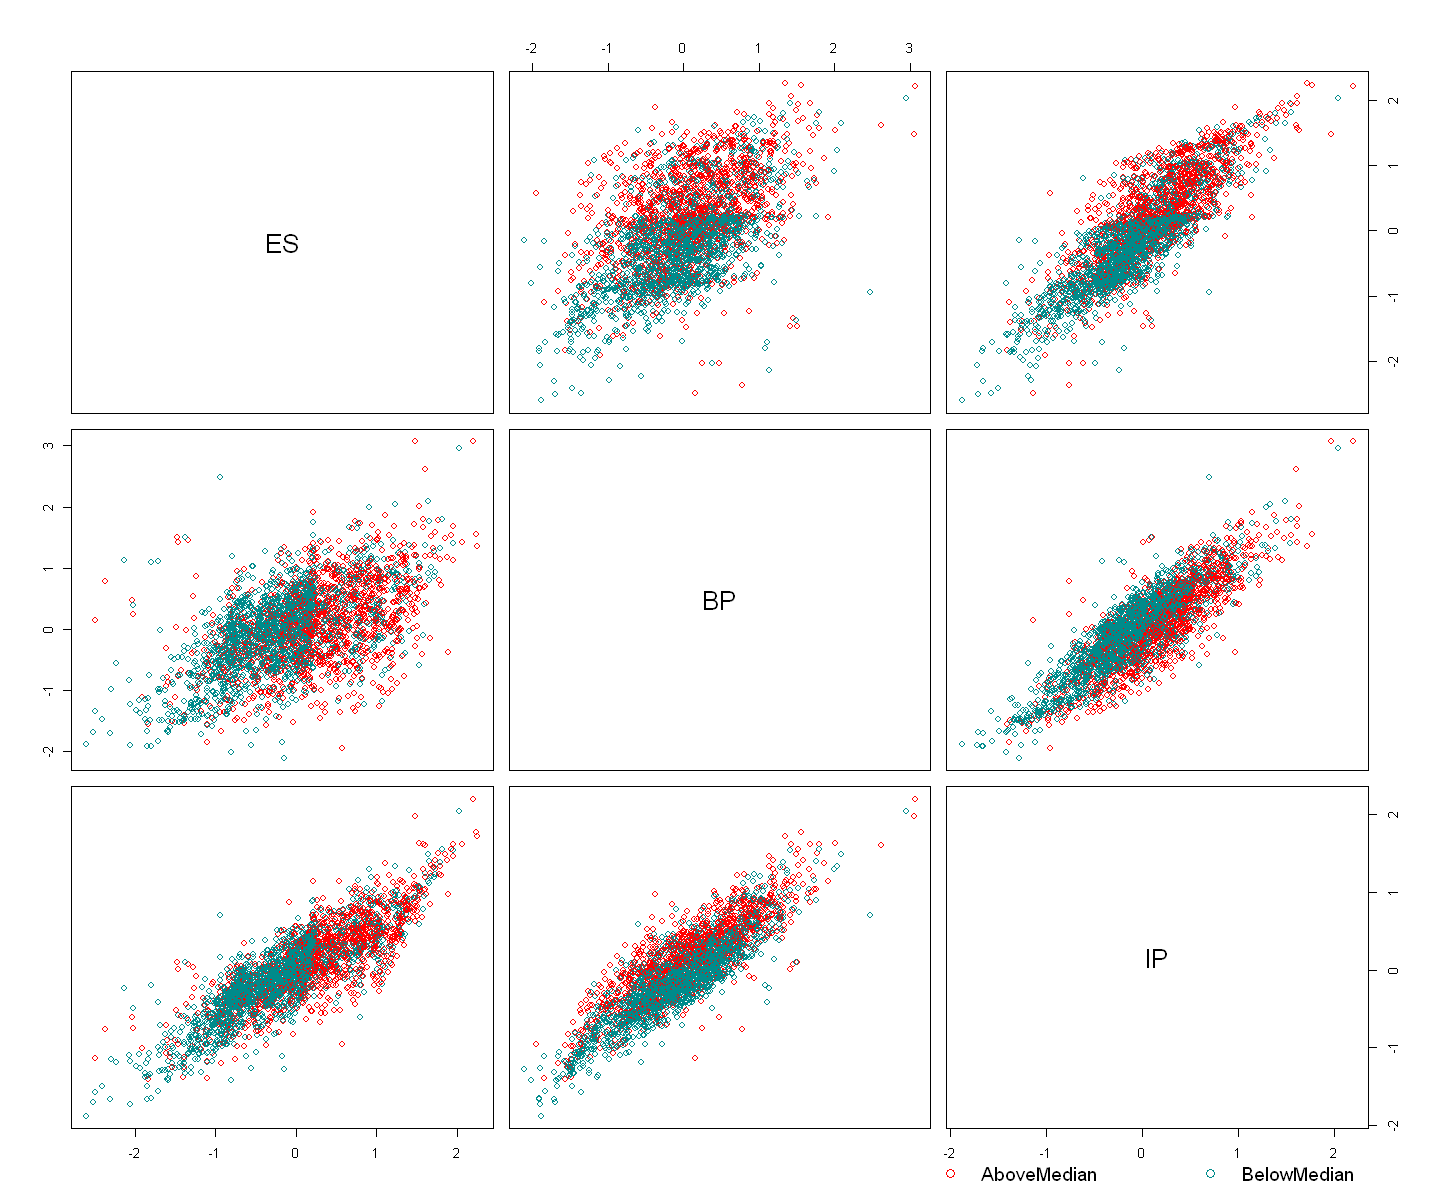

In [80]:


pairs(CWS_female_pred_full[, 1:3], col=CWS_female_pred_full$color)

reset <- function() {
    par(mfrow=c(1, 1), oma=rep(0, 4), mar=rep(0, 4), new=TRUE)
    plot(0:1, 0:1, type="n", xlab="", ylab="", axes=FALSE)
    }

reset()
legend(0.65,0.015, legend=c(levels(CWS_female_pred_full$Age_Category_Female)), col=colors,
       ncol=5, bty="n", pch=1, cex=0.95)

### 5.6.4 Take a Look More on ES (ANOVA)

##### a. Descriptive Statistics

In [81]:
CWS_female_pred_full %>% group_by(Age_Category_Female) %>%get_summary_stats(ES, type = "mean_sd")

Age_Category_Female variable n    mean   sd   
1 AboveMedian         ES       1437  0.218 0.715
2 BelowMedian         ES       1603 -0.202 0.731

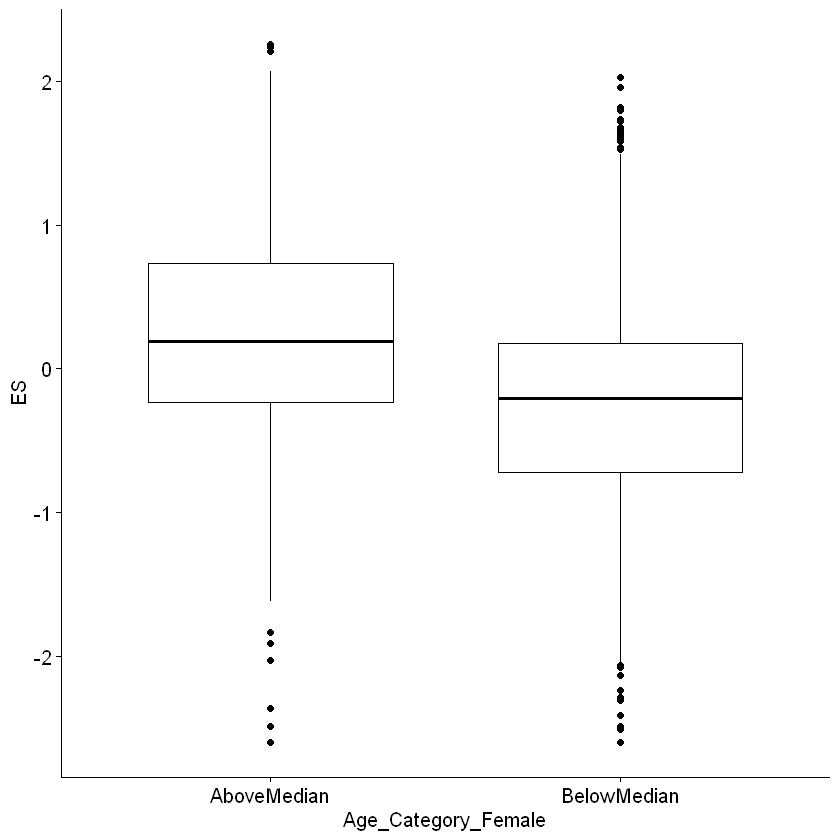

In [82]:
options(repr.plot.width=7, repr.plot.height=7)
ggboxplot(CWS_female_pred_full, x = "Age_Category_Female", y = "ES")

##### b. Extreme Outlier Detection

In [83]:
CWS_female_pred_full %>% group_by(Age_Category_Female) %>% identify_outliers(ES)

Age_Category_Female ES        BP          IP         Age Domicile       
1  AboveMedian         -2.486579  0.15085349 -1.1366343 25  Central Java   
2  AboveMedian         -2.024942  0.24740611 -0.7585806 21  West Java      
3  AboveMedian          2.237050  1.55655633  1.7721803 20  Banten         
4  AboveMedian         -2.598202 -1.88963661 -1.8802868 20  Central Java   
5  AboveMedian         -2.361309  0.78421934 -0.7629606 22  West Java      
6  AboveMedian         -2.029169  0.46792508 -0.6116436 20  Lampung        
7  AboveMedian         -1.833683 -1.56362233 -1.4046839 29  Jakarta        
8  AboveMedian          2.253571  1.34945653  1.7219076 20  Jambi          
9  AboveMedian          2.208059  3.06843102  2.1975027 20  East Kalimantan
10 AboveMedian          2.208059  3.06843102  2.1975027 27  West Java      
11 AboveMedian         -1.911998 -1.10650564 -1.0142037 20  East Kalimantan
12 BelowMedian          1.613057  1.37919618  1.2470450 19  West Java      
13 BelowMedian          1.661904  0.79611877  1.1213816 18  Bali           
14 BelowMedian          1.528616  0.84457534  1.0063928 18  South Sumatra  
15 BelowMedian          1.722323  0.86188511  1.1941097 19  Banten         
16 BelowMedian          1.652816  1.75908144  1.3957161 19  Central Java   
17 BelowMedian          1.539684  1.00877607  1.0659414 19  Central Java   
18 BelowMedian          1.680615  1.01434192  1.2023195 19  West Java      
19 BelowMedian          1.646197  2.08989068  1.4868679 18  Central Java   
20 BelowMedian          1.638596  0.92032331  1.1365014 19  East Java      
21 BelowMedian          1.957524  1.40836405  1.5395180 19  South Sulawesi 
22 BelowMedian          2.027616  2.95513436  2.0435214 18  East Kalimantan
23 BelowMedian          1.599399  0.40526113  0.9480793 18  East Java      
24 BelowMedian          1.796159  1.31669536  1.3893257 18  South Sulawesi 
25 BelowMedian          1.724245  1.27628240  1.3174727 19  South Sulawesi 
26 BelowMedian          1.535925 -0.59377172  0.5915588 19  Yogyakarta     
27 BelowMedian          1.579035 -0.09443342  0.7814884 19  West Java      
28 BelowMedian          1.732977  0.93714956  1.2252627 19  Jakarta        
29 BelowMedian          1.818887  1.80227919  1.5501720 19  Banten         
30 BelowMedian          1.529742  1.07960112  1.0766070 19  West Java      
31 BelowMedian         -2.598202 -1.88963661 -1.8802868 18  Jakarta        
32 BelowMedian         -2.234471 -0.56037288 -1.1872089 19  Central Java   
33 BelowMedian         -2.598202 -1.88963661 -1.8802868 19  West Java      
34 BelowMedian         -2.598202 -1.88963661 -1.8802868 19  South Sumatra  
35 BelowMedian         -2.598202 -1.88963661 -1.8802868 16  West Java      
36 BelowMedian         -2.410150 -1.47048803 -1.5017953 15  West Java      
37 BelowMedian         -2.061079 -1.90151557 -1.7261264 17  West Java      
38 BelowMedian         -2.074532 -0.84258977 -1.1056257 15  Banten         
39 BelowMedian         -2.305313 -1.70935929 -1.6610899 17  West Papua     
40 BelowMedian         -2.486926 -1.34906119 -1.5776679 17  Banten         
41 BelowMedian         -2.287850 -0.97946455 -1.1565859 15  Jakarta        
42 BelowMedian         -2.133206  1.13259898 -0.2386968 17  Lampung        
43 BelowMedian         -2.510657 -1.69348518 -1.7111783 14  Jakarta        
   Domicile_Category   color    is.outlier is.extreme
1  Java Island         red      TRUE       FALSE     
2  Java Island         red      TRUE       FALSE     
3  Java Island         red      TRUE       FALSE     
4  Java Island         red      TRUE       FALSE     
5  Java Island         red      TRUE       FALSE     
6  Outside Java Island red      TRUE       FALSE     
7  Java Island         red      TRUE       FALSE     
8  Outside Java Island red      TRUE       FALSE     
9  Outside Java Island red      TRUE       FALSE     
10 Java Island         red      TRUE       FALSE     
11 Outside Java Island red      TRUE       FALSE     
12 Java Isl

##### c. Normality assumption

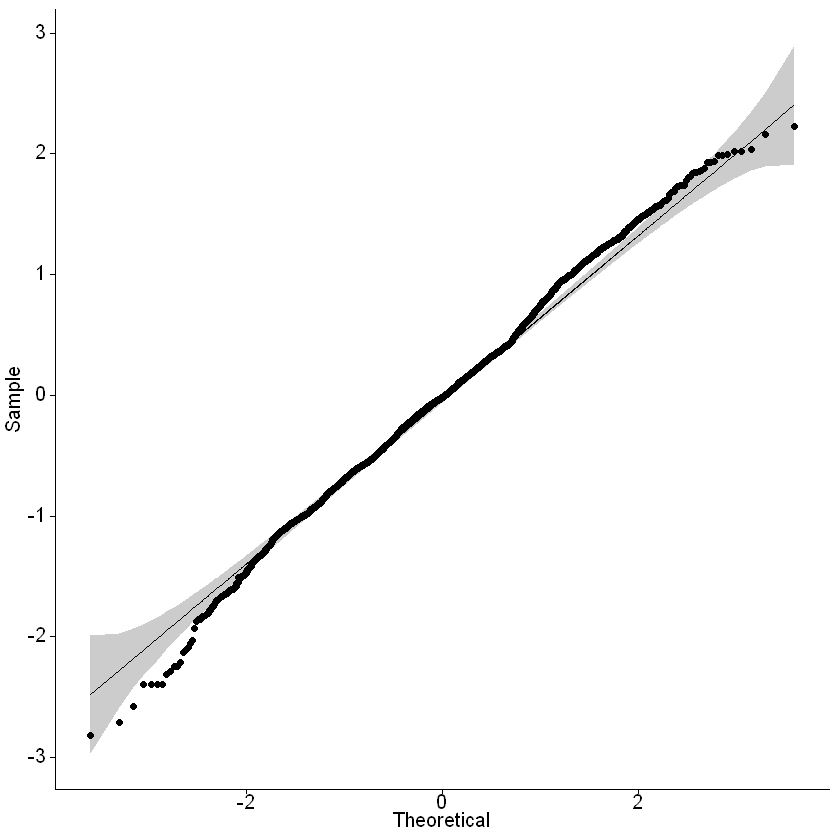

In [84]:
par(mfrow=c(1,2))
ES_mod <- lm(ES ~ Age_Category_Female, data = CWS_female_pred_full)
ggqqplot(residuals(ES_mod))

##### d. Variance assumption

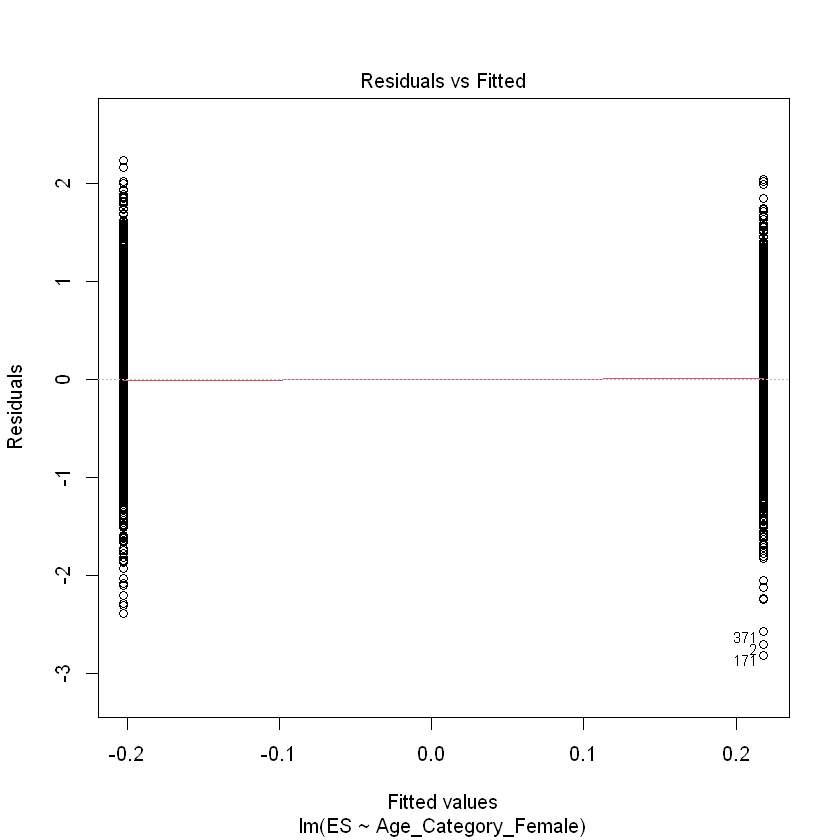

In [85]:
plot(ES_mod, 1)

In [86]:
CWS_female_pred_full %>% levene_test(ES ~ Age_Category_Female)

df1 df2  statistic p        
1 1   3038 0.1274823 0.7210817

In [87]:
ES.aov <- CWS_female_pred_full %>% anova_test(ES ~ Age_Category_Female)
ES.aov

Effect              DFn DFd  F       p        p<.05 ges  
1 Age_Category_Female 1   3038 255.746 2.47e-55 *     0.078






### 5.6.4 Data Visualization of CWS Female by Age Category

In [ ]:
options(repr.plot.width=14, repr.plot.height=9 )
cbind(CWS_female, Age_Category_Female = CWS_female_pred_full$Age_Category_Female)  %>% 
gather('Vars', 'Val', -Age_Category_Female)  %>% 
ggplot(aes(y=Val, x= Age_Category_Female, fill= Age_Category_Female)) + theme(text=element_text(size=21))+
geom_boxplot()+ facet_wrap(~Vars) + theme(axis.text.x = element_text(angle = 90, vjust = 1, hjust=1))+
scale_fill_manual(values=colors)

In [ ]:
CWS_female %>% sapply(., function(x) by(x, CWS_female_pred_full$Age_Category_Female, mean)) %>% t(.) %>% 
data.frame(.) %>% mutate(Above_min_Below=.[,1]-.[, 2])  %>% round(., 2)

<div class="alert-info">
<font color='blue'>
<h3 align="center">
~ 